In [1]:
import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
file = 'D:\\DSEB 63 - NEU\\Năm BA\\Visualization\\Data\\Data\\dseb63_final_project_DP_dataset\\dseb63_application_train.csv'
df1 = pd.read_csv(file,index_col = 0)

In [4]:
df1.head(5)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_CURR
0,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,278621
1,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,139008
2,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,138348
3,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,...,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,64140
4,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,219374


In [5]:
df1.shape

(246009, 122)

In [6]:
df1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246009 entries, 0 to 246008
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    TARGET                        int64  
 1    NAME_CONTRACT_TYPE            object 
 2    CODE_GENDER                   object 
 3    FLAG_OWN_CAR                  object 
 4    FLAG_OWN_REALTY               object 
 5    CNT_CHILDREN                  int64  
 6    AMT_INCOME_TOTAL              float64
 7    AMT_CREDIT                    float64
 8    AMT_ANNUITY                   float64
 9    AMT_GOODS_PRICE               float64
 10   NAME_TYPE_SUITE               object 
 11   NAME_INCOME_TYPE              object 
 12   NAME_EDUCATION_TYPE           object 
 13   NAME_FAMILY_STATUS            object 
 14   NAME_HOUSING_TYPE             object 
 15   REGION_POPULATION_RELATIVE    float64
 16   DAYS_BIRTH                    int64  
 17   DAYS_EMPLOYED                 int64  
 18   DA

# 1st Cleaning 

In [7]:
# Check null
round(df1.isnull().sum() / df1.shape[0] * 100,2)

TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
SK_ID_CURR                     0.0
Length: 122, dtype: float64

In [8]:
# Remove all the cols have %null > 90% 
from Functions import find_and_remove_null_cols
df1 = find_and_remove_null_cols(df1)

In [9]:
### Split df into 2 small ones, numerical and categorical 
numerical_data = df1._get_numeric_data()
categorical_data = df1.drop(columns=numerical_data.columns)

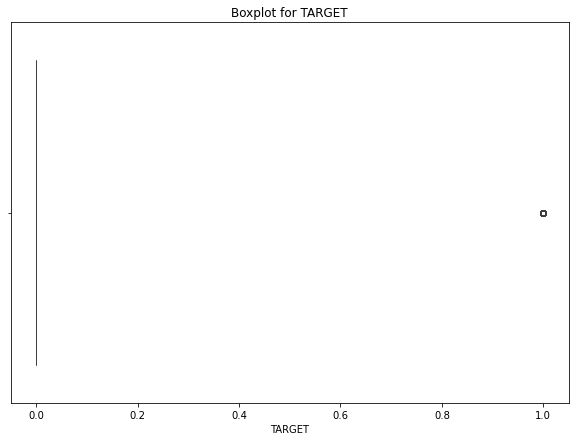

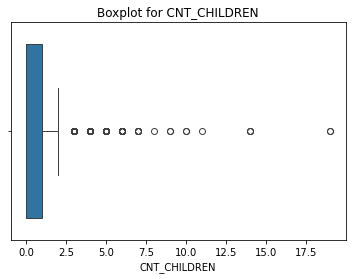

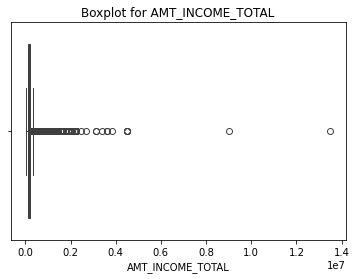

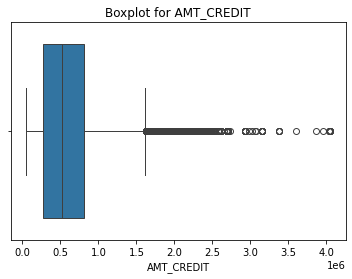

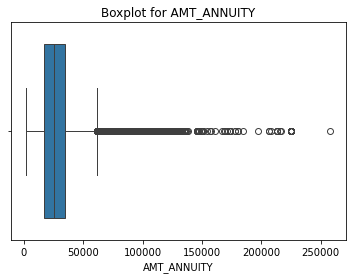

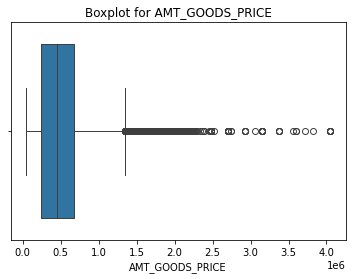

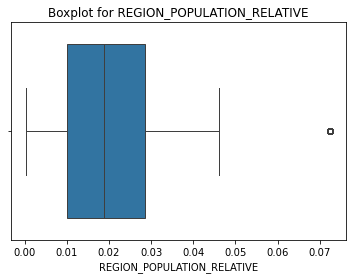

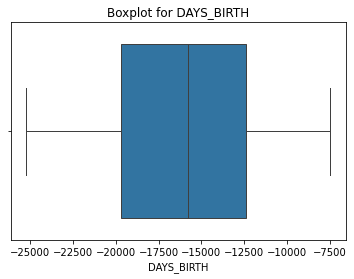

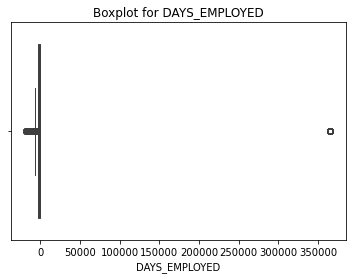

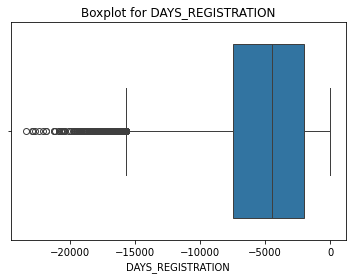

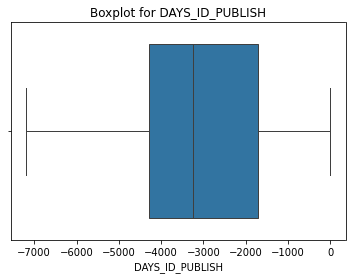

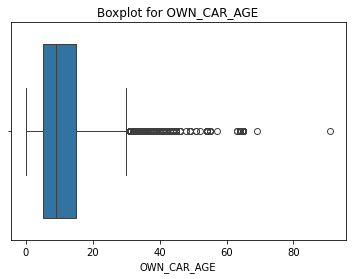

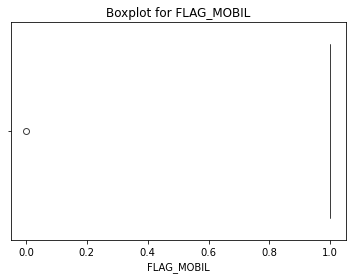

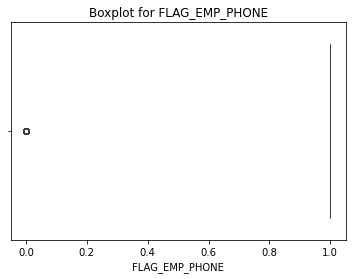

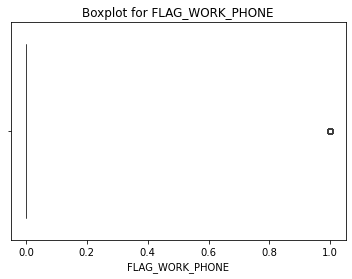

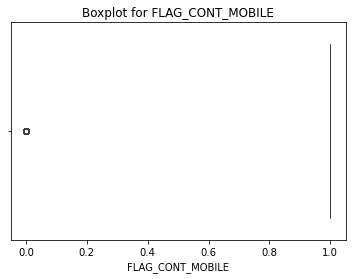

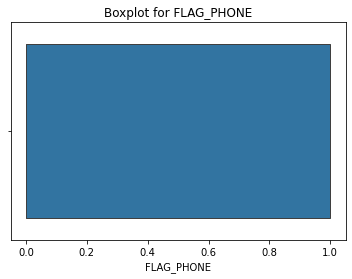

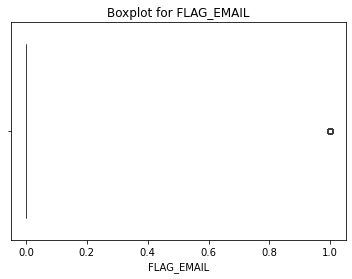

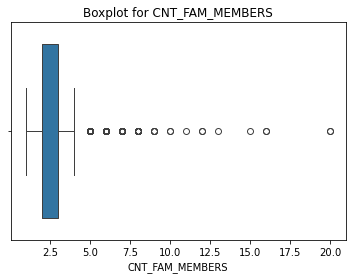

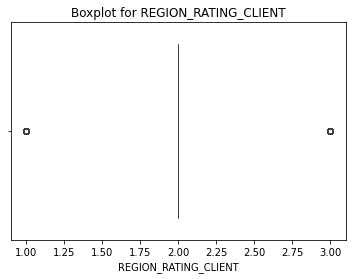

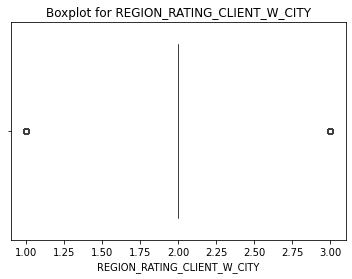

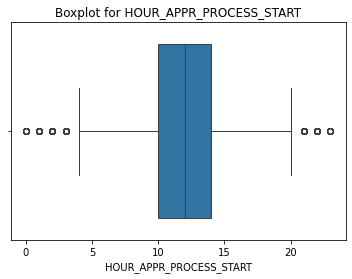

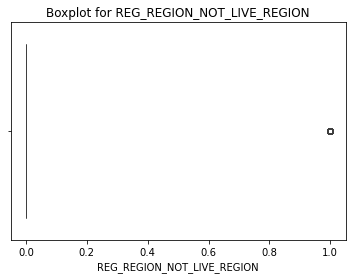

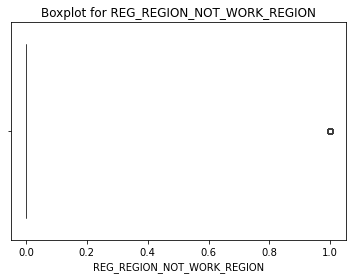

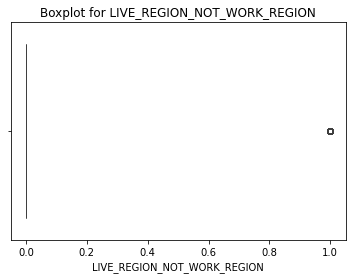

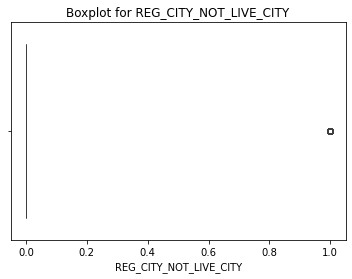

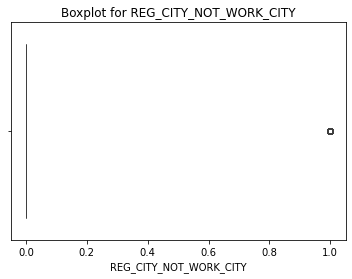

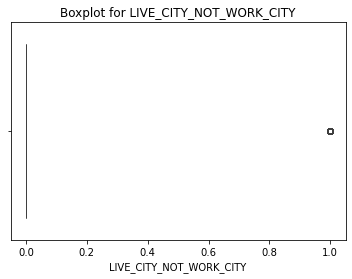

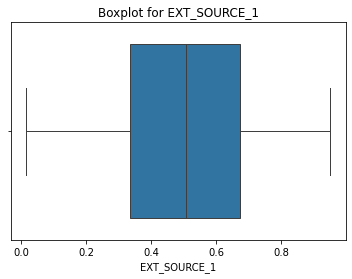

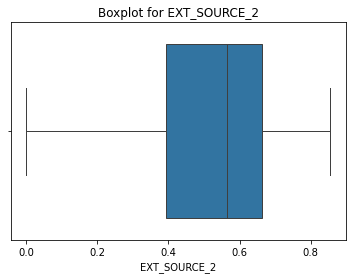

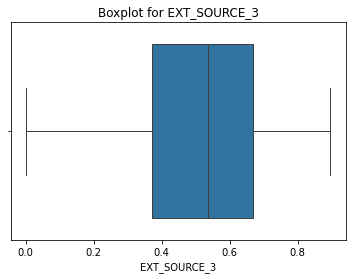

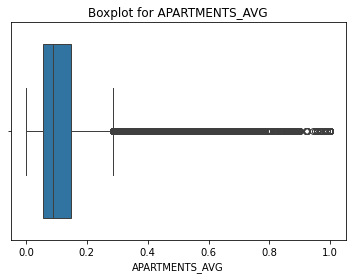

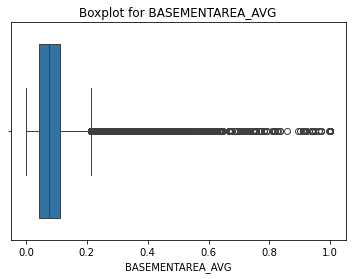

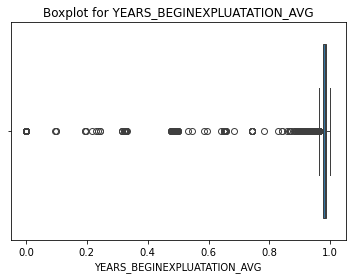

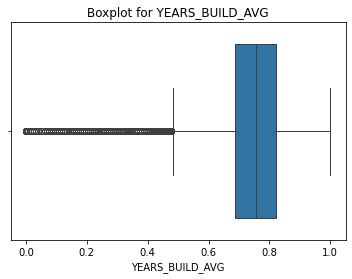

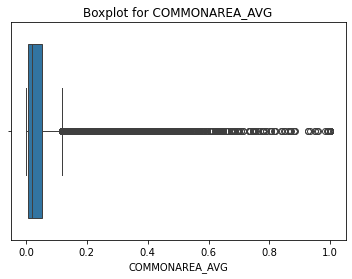

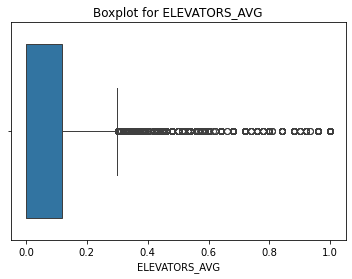

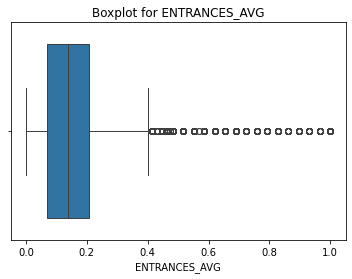

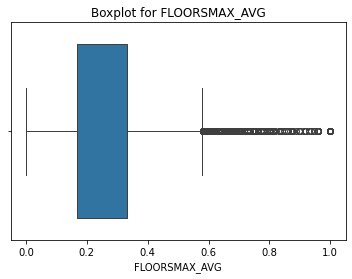

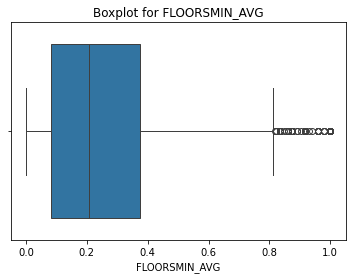

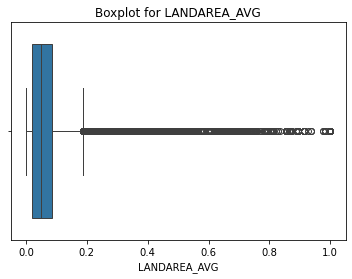

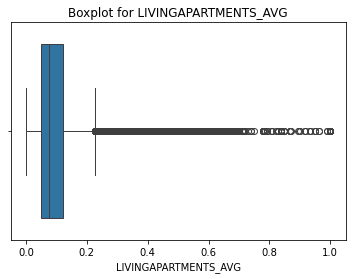

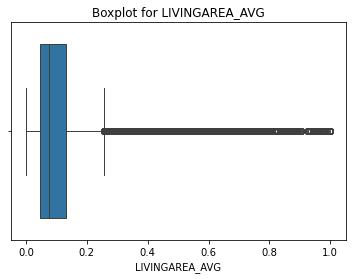

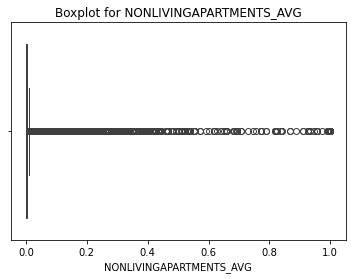

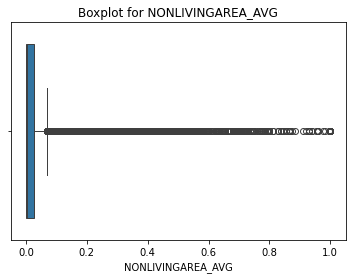

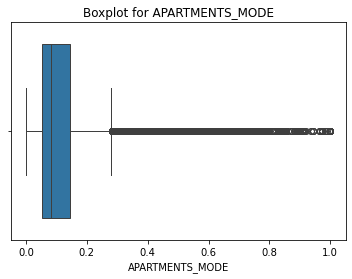

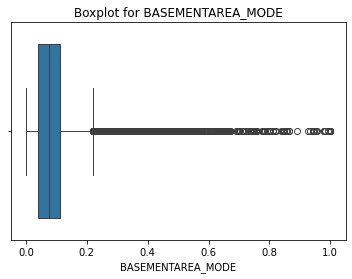

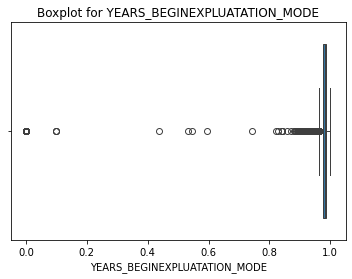

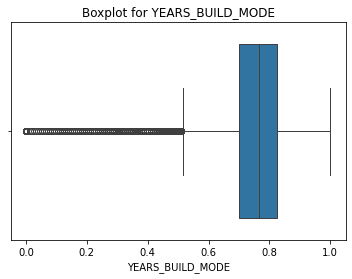

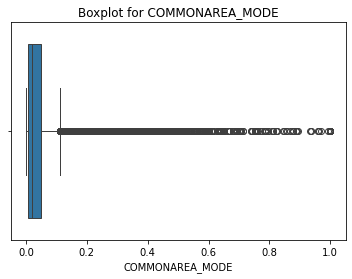

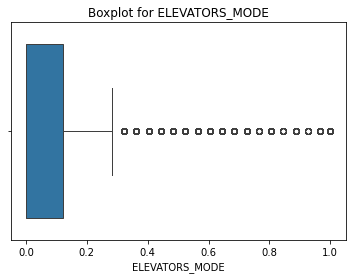

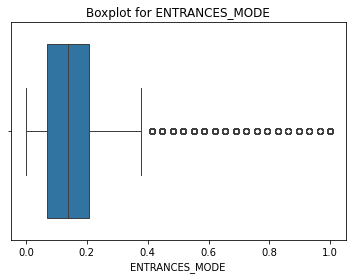

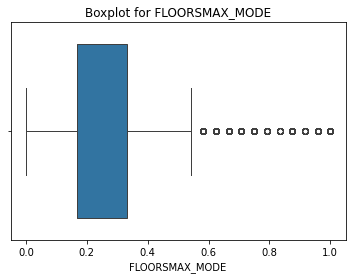

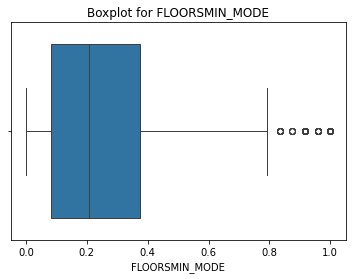

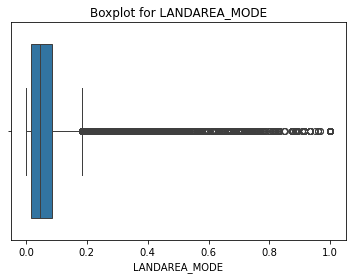

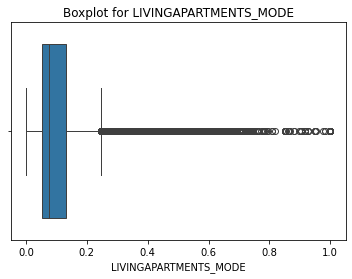

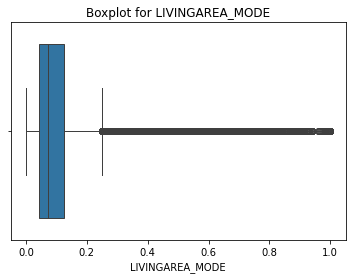

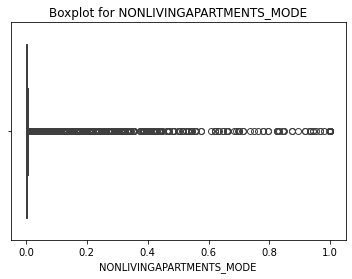

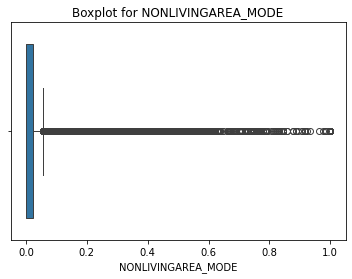

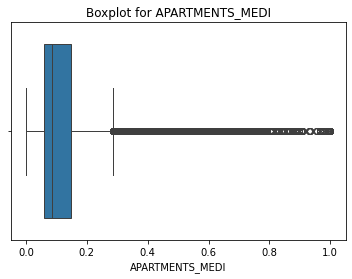

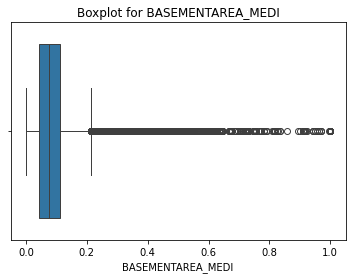

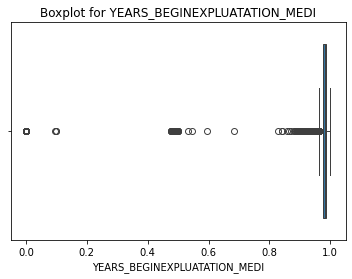

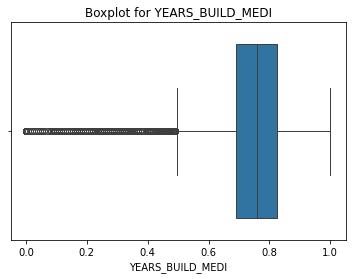

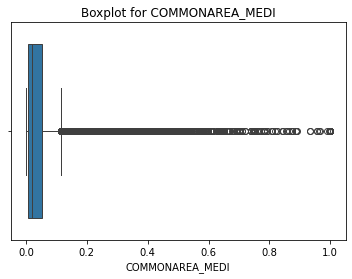

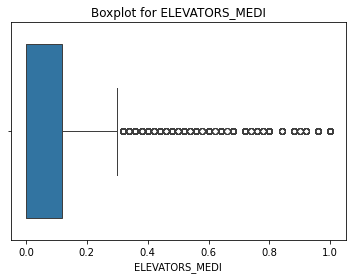

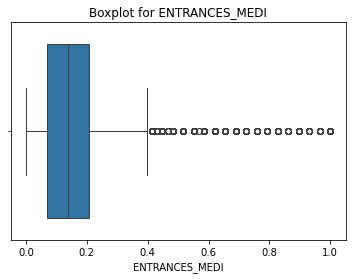

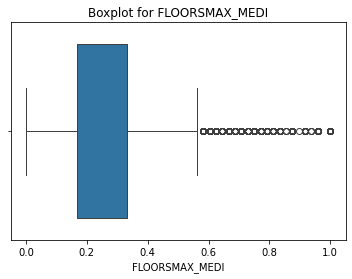

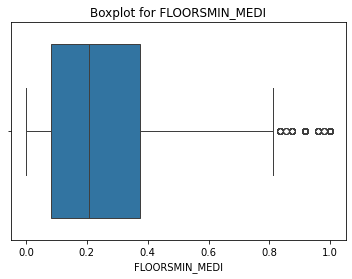

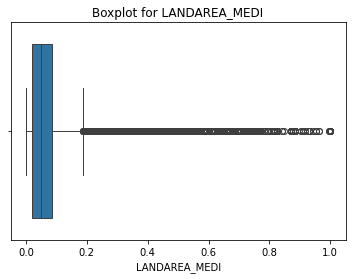

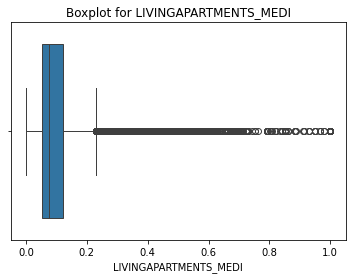

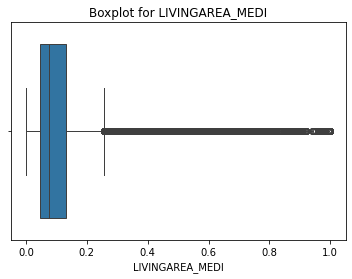

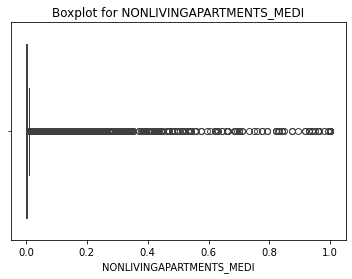

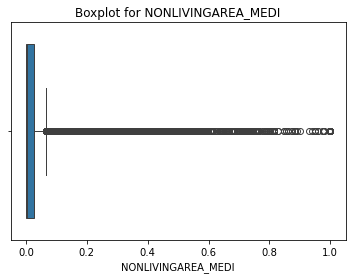

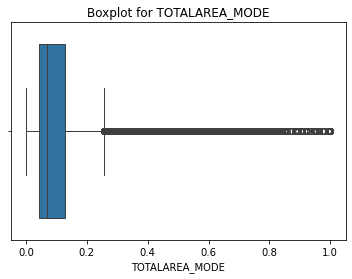

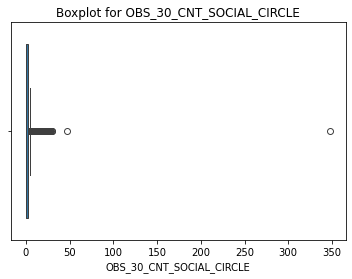

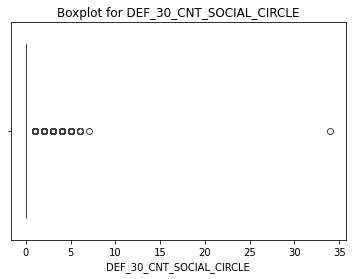

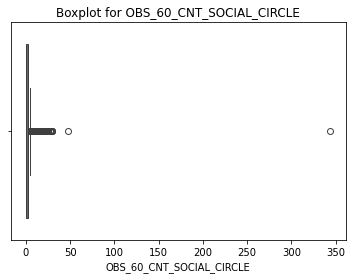

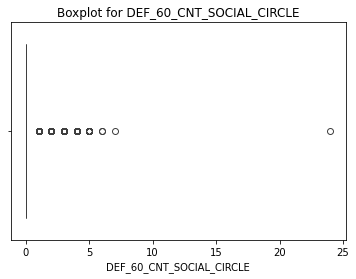

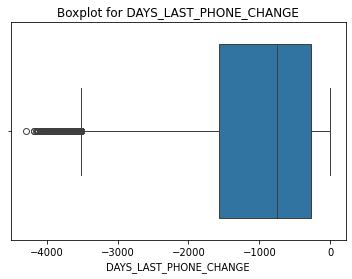

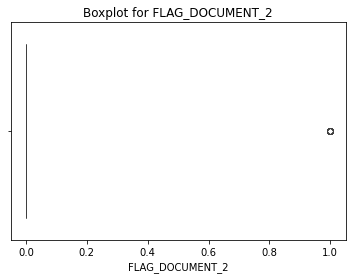

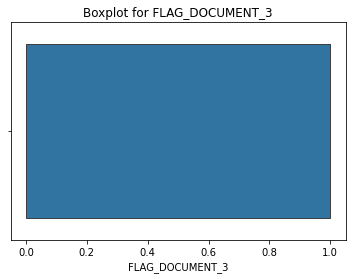

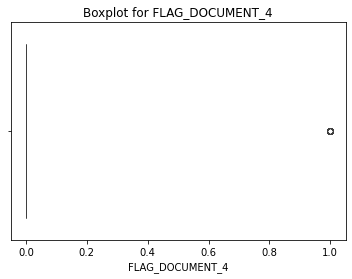

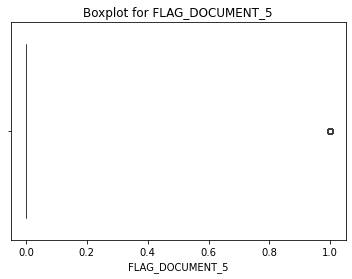

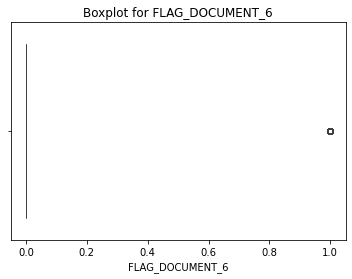

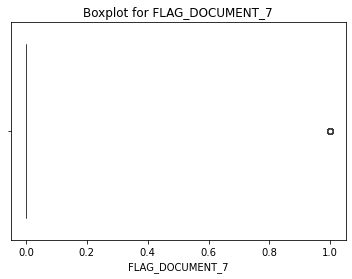

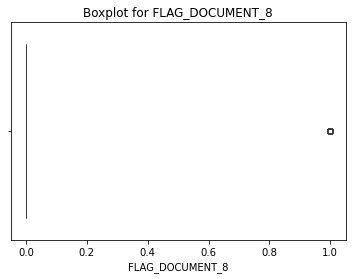

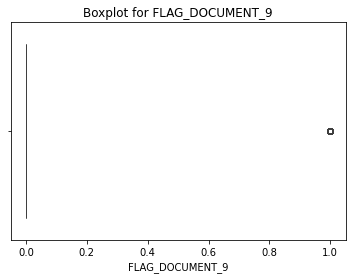

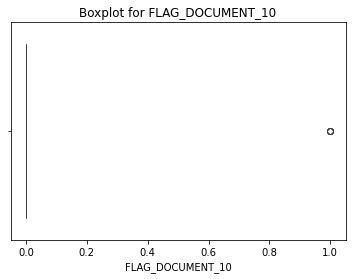

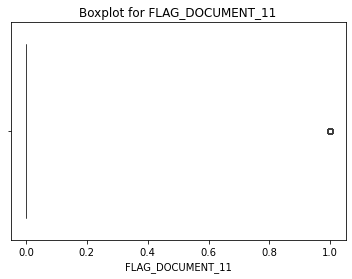

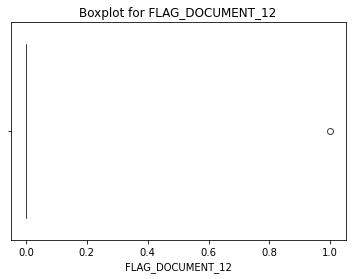

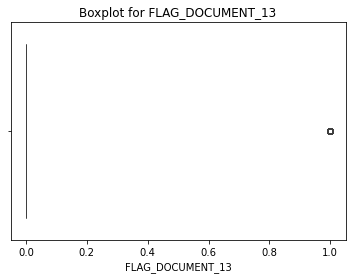

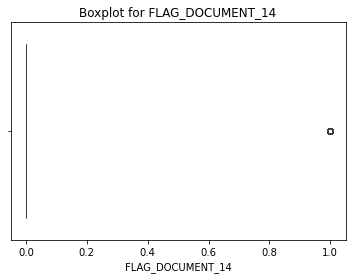

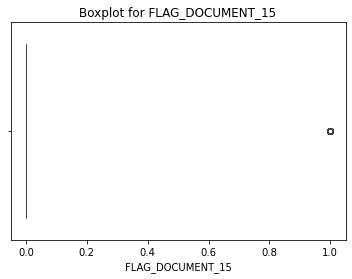

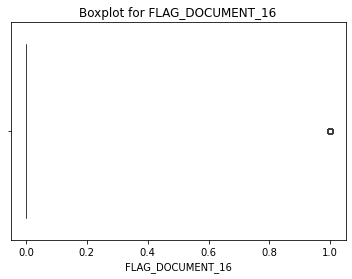

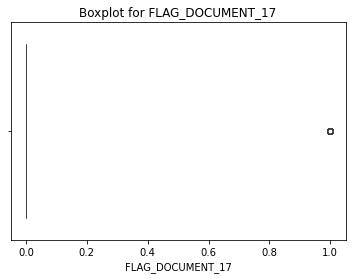

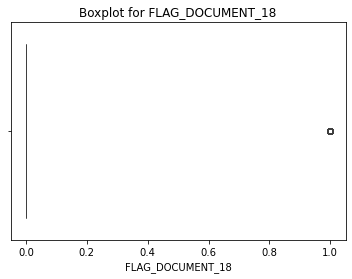

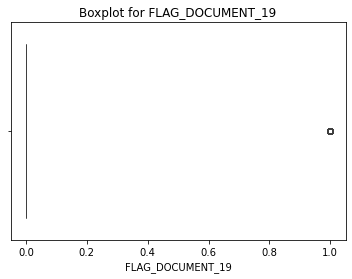

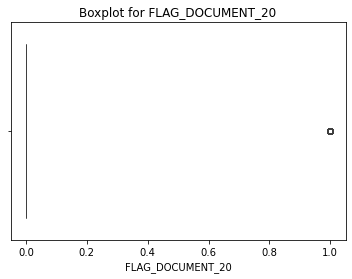

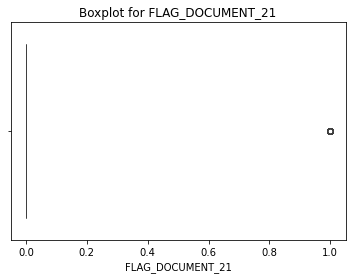

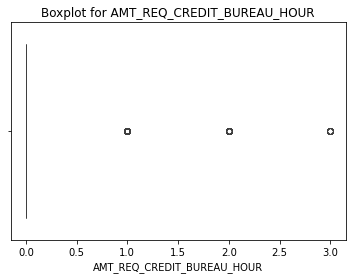

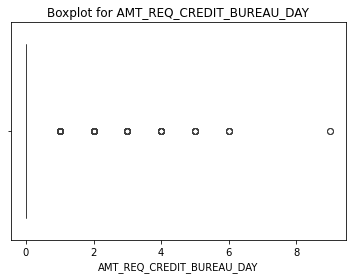

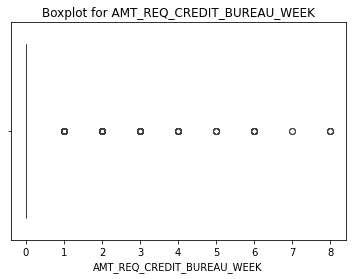

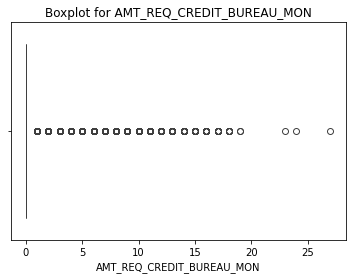

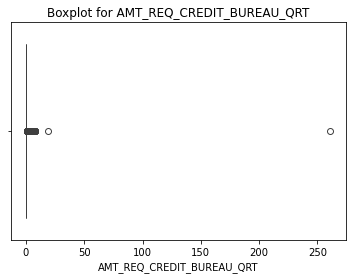

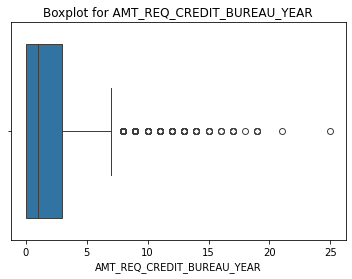

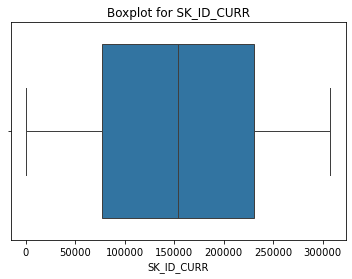

In [10]:
## Check outliters
plt.figure(figsize=(10, 7))

for column in numerical_data.columns:
    # Create a boxplot for the column
    sns.boxplot(x=numerical_data[column])

    # Set the title of the plot
    plt.title(f'Boxplot for {column}')

    # Show the plot
    plt.show()

#### Based on the boxplot for all the numerical data. 
* We see that there are many columns that contain only 2 value (0,1) but the difference between each values is too high. Here are all the table can be seen clearly from the given boxplots

    + The Target value is imbalanced, the value 0 takes a huge part -> that can reduce the accuracy of the model
    + There are a lot of personal information following this trend, like contains phones, or check client's permanent address -> can be removed

    + All the document except document 3 -> should be removed 

In [11]:
# Check valid value
from Functions import check_value
check_value(numerical_data)

TARGET  has     >0 19876,  =0 226133  ,   <0 0,    nan: 0,   other values: 0
CNT_CHILDREN  has     >0 73676,  =0 172333  ,   <0 0,    nan: 0,   other values: 0
AMT_INCOME_TOTAL  has     >0 246009,  =0 0  ,   <0 0,    nan: 0,   other values: 0
AMT_CREDIT  has     >0 246009,  =0 0  ,   <0 0,    nan: 0,   other values: 0
AMT_ANNUITY  has     >0 245999,  =0 0  ,   <0 0,    nan: 10,   other values: 0
AMT_GOODS_PRICE  has     >0 245785,  =0 0  ,   <0 0,    nan: 224,   other values: 0
REGION_POPULATION_RELATIVE  has     >0 246009,  =0 0  ,   <0 0,    nan: 0,   other values: 0
DAYS_BIRTH  has     >0 0,  =0 0  ,   <0 246009,    nan: 0,   other values: 0
DAYS_EMPLOYED  has     >0 44324,  =0 2  ,   <0 201683,    nan: 0,   other values: 0
DAYS_REGISTRATION  has     >0 0,  =0 59  ,   <0 245950,    nan: 0,   other values: 0
DAYS_ID_PUBLISH  has     >0 0,  =0 13  ,   <0 245996,    nan: 0,   other values: 0
OWN_CAR_AGE  has     >0 82120,  =0 1701  ,   <0 0,    nan: 162188,   other values: 0
FLAG_MOBIL

In [12]:
for i in categorical_data.columns[:8]:
    print(f'col {i} : {list(categorical_data[i].unique())}\n')

col NAME_CONTRACT_TYPE : ['Cash loans', 'Revolving loans']

col CODE_GENDER : ['F', 'M', 'XNA']

col FLAG_OWN_CAR : ['N', 'Y']

col FLAG_OWN_REALTY : ['N', 'Y']

col NAME_TYPE_SUITE : ['Family', 'Unaccompanied', 'Spouse, partner', 'Children', 'Other_A', nan, 'Group of people', 'Other_B']

col NAME_INCOME_TYPE : ['State servant', 'Working', 'Pensioner', 'Commercial associate', 'Unemployed', 'Student', 'Businessman', 'Maternity leave']

col NAME_EDUCATION_TYPE : ['Higher education', 'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']

col NAME_FAMILY_STATUS : ['Married', 'Civil marriage', 'Single / not married', 'Widow', 'Separated', 'Unknown']



In [13]:
for i in categorical_data.columns[8:]:
    print(f'col {i} : {list(categorical_data[i].unique())}\n')

col NAME_HOUSING_TYPE : ['House / apartment', 'Rented apartment', 'With parents', 'Municipal apartment', 'Office apartment', 'Co-op apartment']

col OCCUPATION_TYPE : ['Core staff', 'Laborers', 'Managers', nan, 'Drivers', 'Sales staff', 'Cleaning staff', 'Private service staff', 'Medicine staff', 'Security staff', 'Accountants', 'Cooking staff', 'High skill tech staff', 'Low-skill Laborers', 'Realty agents', 'Secretaries', 'Waiters/barmen staff', 'IT staff', 'HR staff']

col WEEKDAY_APPR_PROCESS_START : ['MONDAY', 'WEDNESDAY', 'THURSDAY', 'SATURDAY', 'FRIDAY', 'TUESDAY', 'SUNDAY']

col ORGANIZATION_TYPE : ['School', 'Business Entity Type 3', 'Religion', 'Other', 'XNA', 'Electricity', 'Medicine', 'Self-employed', 'Transport: type 2', 'Business Entity Type 2', 'Construction', 'Housing', 'Kindergarten', 'Trade: type 7', 'Industry: type 11', 'Military', 'Services', 'Security Ministries', 'Transport: type 4', 'Government', 'Emergency', 'Security', 'Trade: type 2', 'University', 'Transport: 

# EDA Process

### Univariate

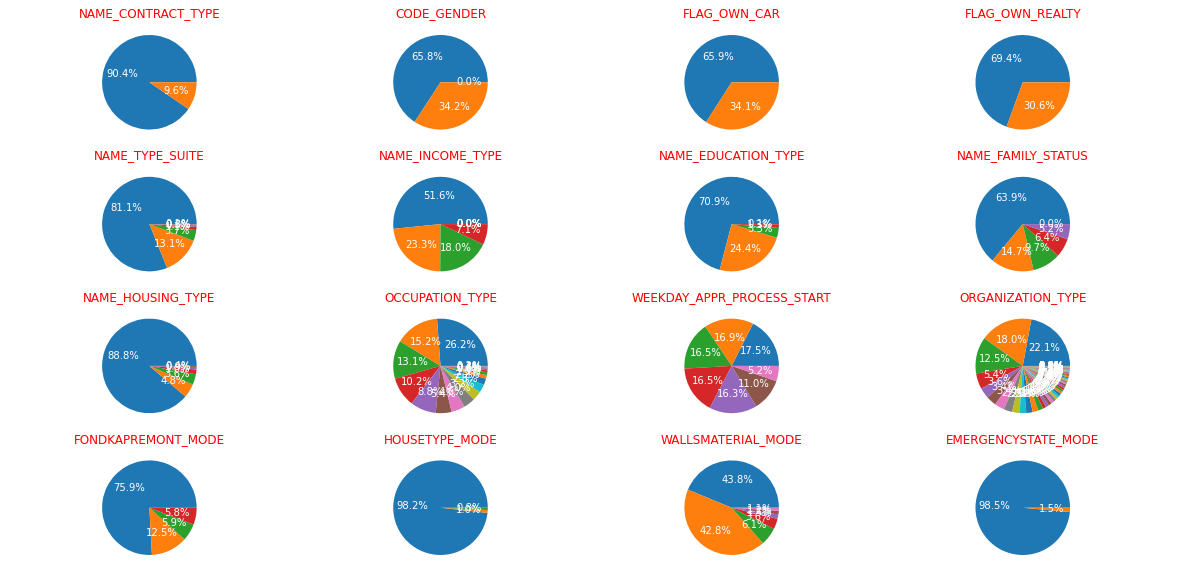

In [14]:
# Check the distribution of categorical columns
col= categorical_data.columns
fig, ax = plt.subplots(round(len(col)/4),4,figsize=(20,10))
ite = 0 
for i in range(0,round(len(col)/4)):
    for j in range(0,4):
        sizes = categorical_data[col[ite]].value_counts(normalize=True)
        ax[i][j].pie(sizes, autopct='%1.1f%%',labels = sizes.index, textprops=dict(color="white"))
        ax[i][j].set_title(col[ite], color = 'red')
        ite +=1
# Show the figure
plt.show()

Followed this chart, we can see that:

* Name_housing_type 88.8% loaning clients live in their own house 
* In Name_type_suite, Almost the clients take a loan by themselves -> they are in the middle - age
* And in housetype_mode and emergencystate_mode , they have a signigicant differences between each value -> we can drop these columns 

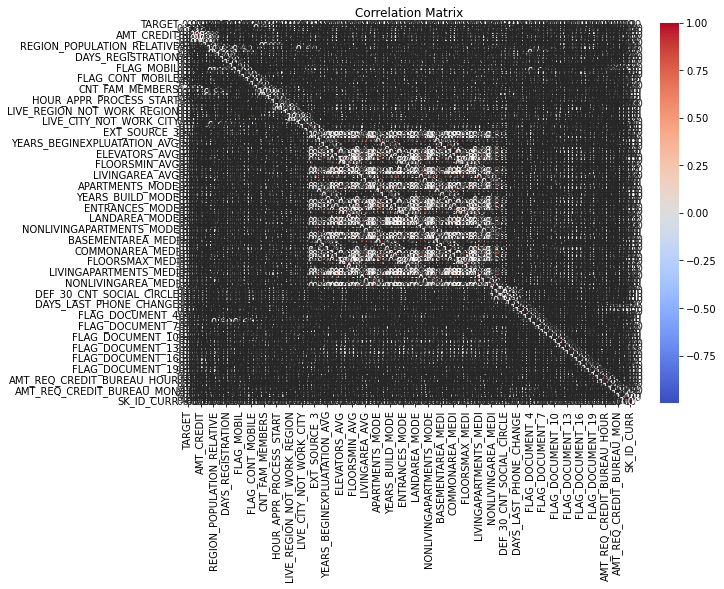

In [15]:
## Check corr between all the numerical features
correlation_matrix = df1.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


* it's hard to see so i divide this dataset into some small parts

# Bivariate and multivariate

## The Effect of all the features to the target columns
* This data set is all about the information related to clients
* I can divide it into small parts
    + Personal Information (13)
    + Working and Education Information (4) (v)
    + Asset Information (6) (v)
    + Contact Information (7) (v)
    + Region Information (9) (v)
    + Housing Information(47) (v)
    + Social Information(4) (v)
    + Ext Source Information(3) (v)
    + Document Information(20) (v)
    + Bureau Information (6) (v)

### Personal Information

In [123]:
pinfo_col = ['NAME_CONTRACT_TYPE','CODE_GENDER', 'CNT_CHILDREN', 'NAME_HOUSING_TYPE',
             'NAME_TYPE_SUITE','NAME_FAMILY_STATUS','CNT_FAM_MEMBERS',  'AMT_INCOME_TOTAL',
            'DAYS_BIRTH', 'DAYS_EMPLOYED','WEEKDAY_APPR_PROCESS_START',
            'HOUR_APPR_PROCESS_START','DAYS_REGISTRATION','DAYS_ID_PUBLISH','TARGET']
pinfo = df1[pinfo_col]
pinfo

,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,NAME_HOUSING_TYPE,NAME_TYPE_SUITE,NAME_FAMILY_STATUS,CNT_FAM_MEMBERS,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,DAYS_REGISTRATION,DAYS_ID_PUBLISH,TARGET
0,Cash loans,F,0,House / apartment,Family,Married,2.0,270000.0,-16765,-1188,MONDAY,11,-1186.0,-291,0
1,Cash loans,F,0,House / apartment,Unaccompanied,Civil marriage,2.0,135000.0,-19005,-3039,WEDNESDAY,17,-9833.0,-2437,0
2,Cash loans,M,0,House / apartment,Unaccompanied,Single / not married,1.0,121500.0,-19932,-3038,THURSDAY,11,-4311.0,-3458,0
3,Cash loans,M,0,House / apartment,"Spouse, partner",Married,2.0,99000.0,-16941,-1588,WEDNESDAY,16,-4970.0,-477,0
4,Cash loans,M,0,House / apartment,Unaccompanied,Married,2.0,360000.0,-18850,-449,MONDAY,16,-4597.0,-2379,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246004,Cash loans,M,0,With parents,Unaccompanied,Separated,1.0,157500.0,-9327,-236,THURSDAY,15,-8456.0,-1982,0
246005,Cash loans,F,0,House / apartment,Unaccompanied,Widow,1.0,72000.0,-20775,365243,MONDAY,8,-4388.0,-4090,0
246006,Cash loans,F,0,House / apartment,Unaccompanied,Separated,1.0,153000.0,-14966,-7921,THURSDAY,9,-6737.0,-5150,0
246007,Cash loans,F,0,House / apartment,Unaccompanied,Married,2.0,171000.0,-11961,-4786,WEDNESDAY,9,-2562.0,-931,1


In [131]:
# personal info focus on the clients
pinfo_1 = pinfo.iloc[:,:8]
pinfo_1['TARGET'] = pinfo['TARGET']
# numerical col
num_pinfo_1 = pinfo_1._get_numeric_data()
cat_pinfo_1 = pinfo_1.drop(columns=num_pinfo_1.columns,axis =0)

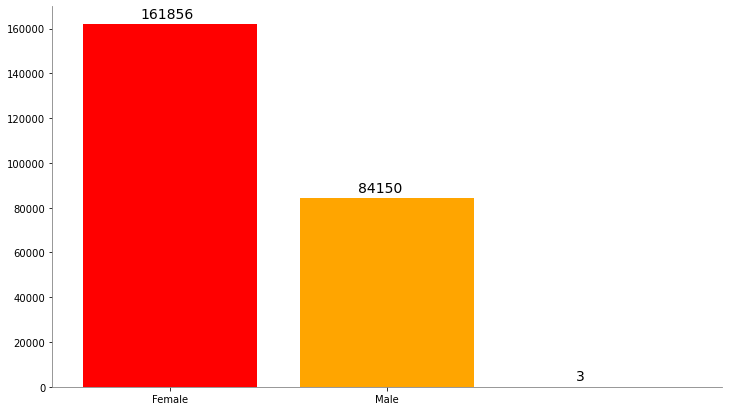

In [158]:
a = pinfo_1["CODE_GENDER"].value_counts()
fig,ax = plt.subplots(figsize = (12,7))
ax.bar(a.index,a.values,color = ['red', 'orange','blue'])
x= ["Female", 'Male' ]
plt.xticks([0,1],x)
ax.spines[['top', "right"]].set_visible(False)
ax.spines[['left', 'bottom']].set_color('grey')
for p in ax.patches:
    x,y = p.get_xy()
    width = p.get_width()
    height = p.get_height()
    ax.annotate(xy = (x + width/3, height + 3000), text = height, size = 14)


+ The number of Female Clients is two times higher than Male Clients

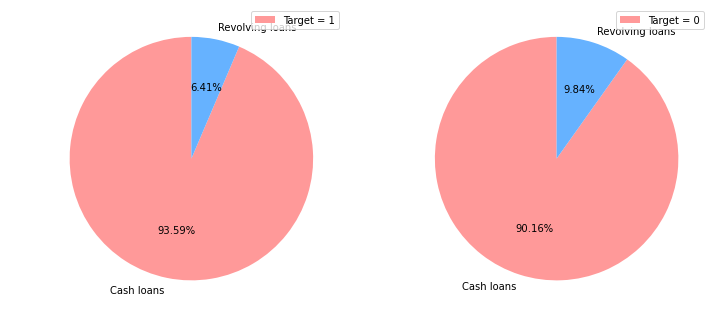

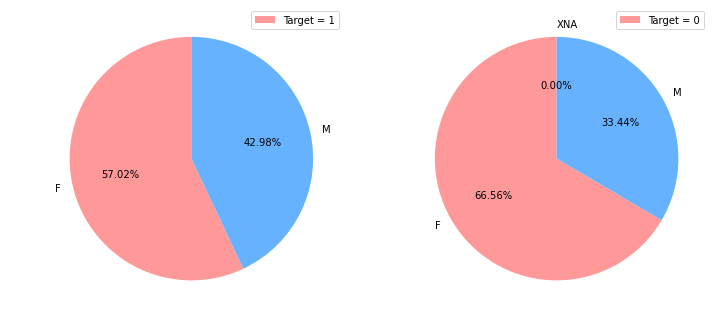

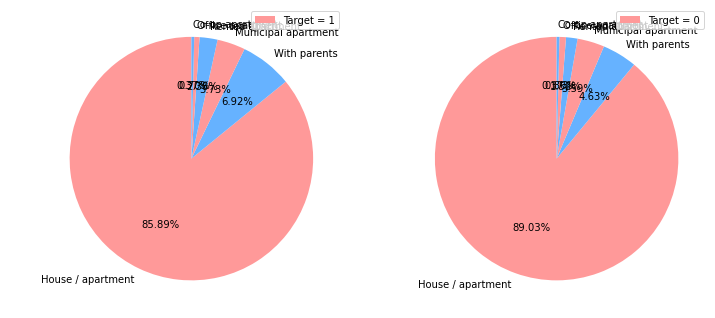

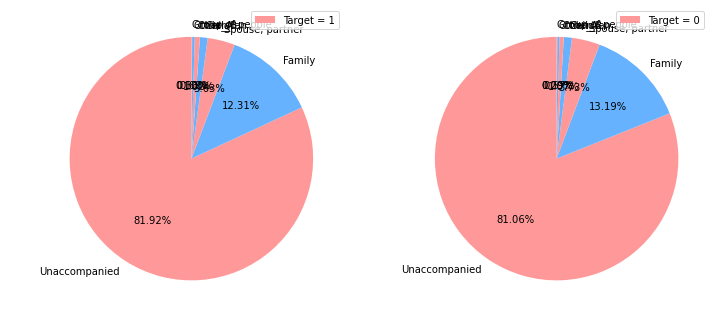

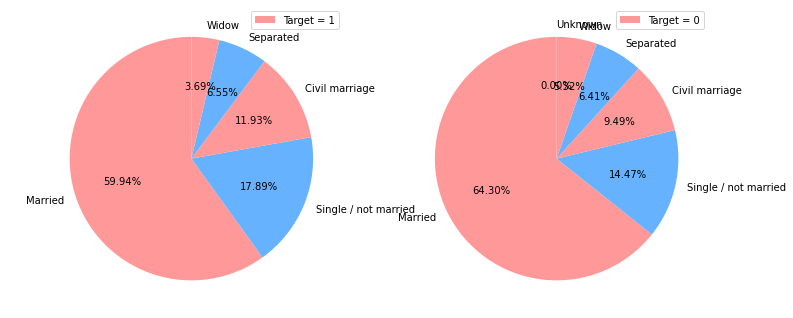

In [132]:
# categorical col in pinfo_1
for i in cat_pinfo_1.columns:
    fig, ax = plt.subplots(1,2,figsize = (12,7))
    ax[0].pie(x=pinfo_1 [pinfo_1 ['TARGET']==1][i].value_counts(),\
    labels=pinfo_1 [pinfo_1 ['TARGET']==1][i].value_counts().index,\
    startangle=90,autopct='%.2f%%',colors=['#FF9999', '#66B2FF']) 

    ax[1].pie(x=pinfo_1 [pinfo_1 ['TARGET']==0][i].value_counts(),\
    labels=pinfo_1 [pinfo_1 ['TARGET']==0][i].value_counts().index,\
    startangle=90,autopct='%.2f%%',colors=['#FF9999', '#66B2FF']) 

    ax[0].set_ylabel(f'{i}' + '\n', fontweight='bold', fontsize=12,color = 'white')
    ax[0].legend(labels=['Target = 1'])
    ax[1].legend(labels=['Target = 0'])

+ These features is related to personal information so i think it's efficient with the model

<AxesSubplot:>

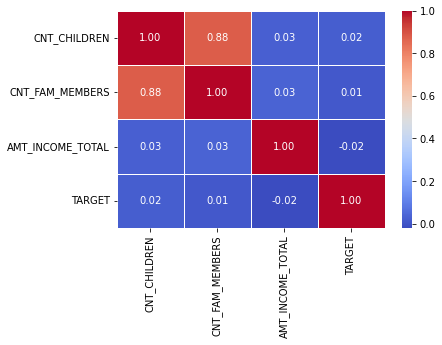

In [137]:
# numerical col
sns.heatmap( num_pinfo_1.corr(),\
            annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

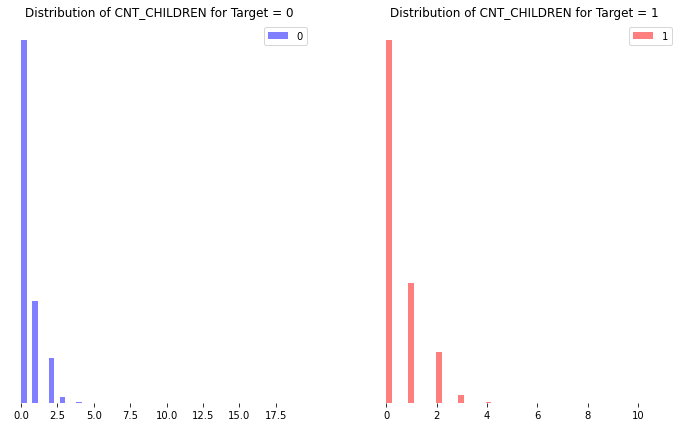

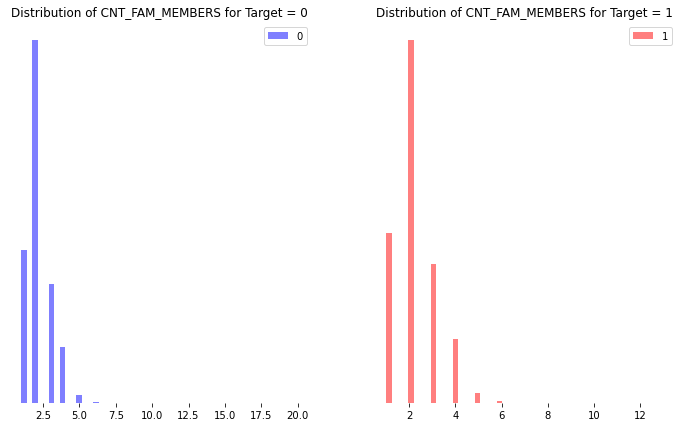

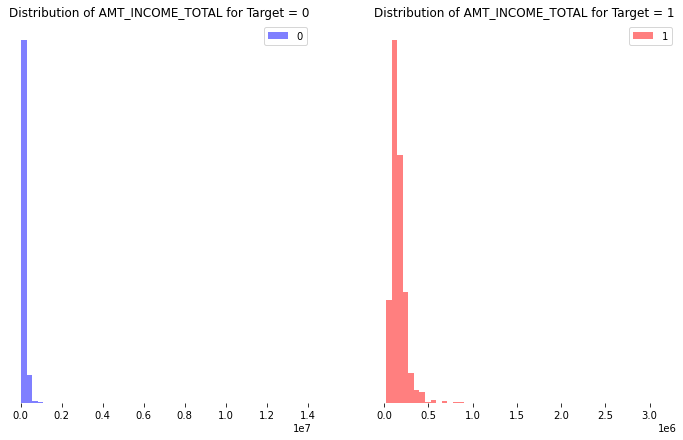

In [136]:
for i in num_pinfo_1.columns[:3]:
    fig,ax = plt.subplots(1,2 ,figsize = (12,7))
    class0 = num_pinfo_1[num_pinfo_1['TARGET'] == 0][i]
    class1 = num_pinfo_1[num_pinfo_1['TARGET'] == 1][i]

    ax[0].hist(class0, label='0', alpha=0.5, color='blue', bins=50)
    ax[1].hist(class1, label='1', alpha=0.5, color='red', bins=50)

    ax[0].set_title(f'Distribution of {i} for Target = 0')
    ax[1].set_title(f'Distribution of {i} for Target = 1')

    ax[0].spines[['left','top','right','bottom']].set_visible(False)
    ax[0].set_yticklabels([])
    ax[0].tick_params(left = False)
    ax[0].legend()

    ax[1].spines[['left','top','right','bottom']].set_visible(False)
    ax[1].set_yticklabels([])
    ax[1].tick_params(left = False)
    ax[1].legend()

In [121]:
# The infor relating to time
# Day related to the loan
ltime_pinfo = pinfo[['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','DAYS_REGISTRATION','DAYS_ID_PUBLISH','TARGET']]

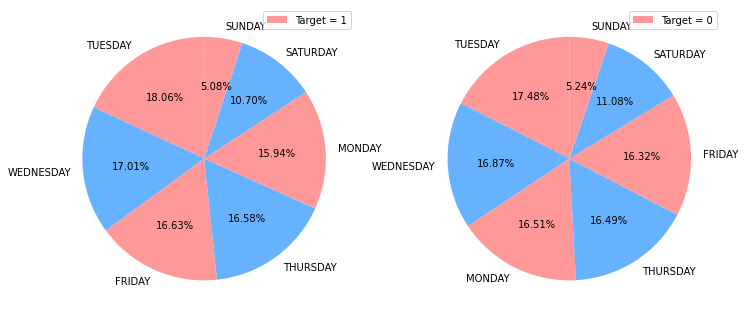

In [105]:
# categorical col in ltime_pinfo
fig, ax = plt.subplots(1,2,figsize = (12,7))
ax[0].pie(x=ltime_pinfo[ltime_pinfo['TARGET']==1]['WEEKDAY_APPR_PROCESS_START'].value_counts(),\
labels=ltime_pinfo[ltime_pinfo['TARGET']==1]['WEEKDAY_APPR_PROCESS_START'].value_counts().index,\
startangle=90,autopct='%.2f%%',colors=['#FF9999', '#66B2FF']) 

ax[1].pie(x=ltime_pinfo[ltime_pinfo['TARGET']==0]['WEEKDAY_APPR_PROCESS_START'].value_counts(),\
labels=ltime_pinfo[ltime_pinfo['TARGET']==0]['WEEKDAY_APPR_PROCESS_START'].value_counts().index,\
startangle=90,autopct='%.2f%%',colors=['#FF9999', '#66B2FF']) 

ax[0].set_ylabel('WEEKDAY_APPR_PROCESS_START' + '\n', fontweight='bold', fontsize=12,color = 'white')
ax[0].legend(labels=['Target = 1'])
ax[1].legend(labels=['Target = 0'])

<AxesSubplot:>

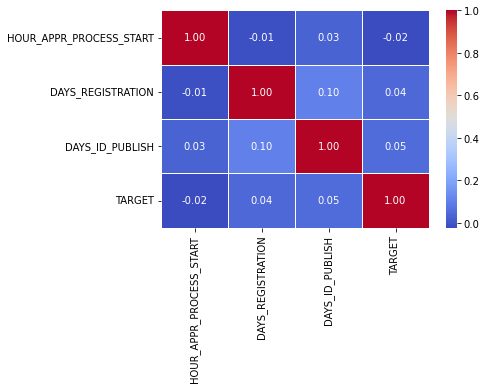

In [106]:
ltime_pinfo = ltime_pinfo.drop(columns = 'WEEKDAY_APPR_PROCESS_START',axis = 0)
sns.heatmap(ltime_pinfo.corr(),\
            annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

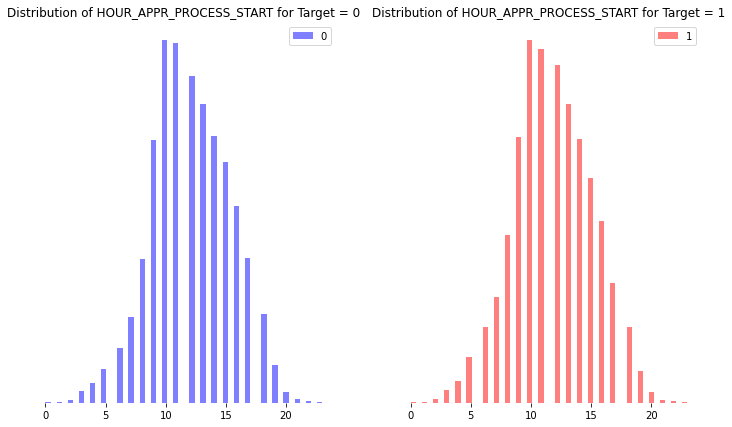

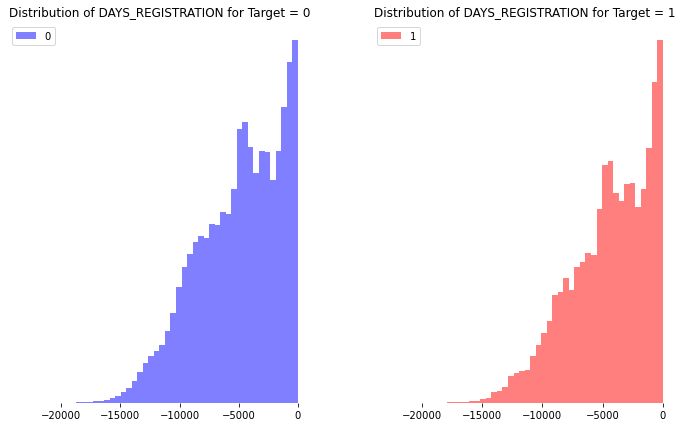

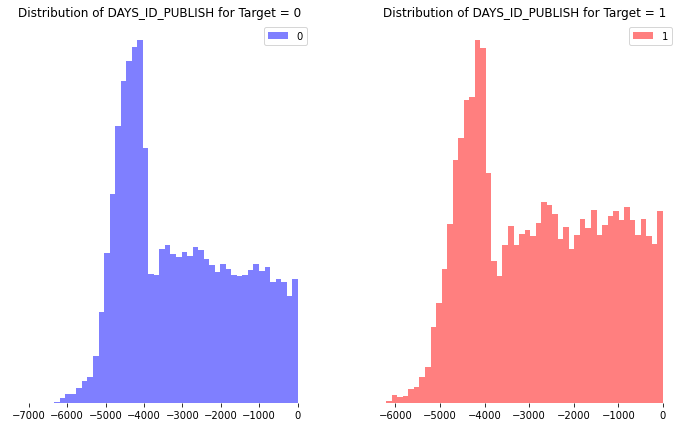

In [110]:
for i in ltime_pinfo.columns[:3]:
    fig,ax = plt.subplots(1,2 ,figsize = (12,7))
    class0 = ltime_pinfo[ltime_pinfo['TARGET'] == 0][i]
    class1 = ltime_pinfo[ltime_pinfo['TARGET'] == 1][i]

    ax[0].hist(class0, label='0', alpha=0.5, color='blue', bins=50)
    ax[1].hist(class1, label='1', alpha=0.5, color='red', bins=50)

    ax[0].set_title(f'Distribution of {i} for Target = 0')
    ax[1].set_title(f'Distribution of {i} for Target = 1')

    ax[0].spines[['left','top','right','bottom']].set_visible(False)
    ax[0].set_yticklabels([])
    ax[0].tick_params(left = False)
    ax[0].legend()

    ax[1].spines[['left','top','right','bottom']].set_visible(False)
    ax[1].set_yticklabels([])
    ax[1].tick_params(left = False)
    ax[1].legend()

+ All the distribution of each features with target value seems to be similar
+ The corr of numerical col is low with target value 

-> these features do not have any strong impact to Target value -> Can be removed all

In [117]:
# Day related to the Clients
ctime_pinfo = pinfo[['DAYS_BIRTH', 'DAYS_EMPLOYED']]
ctime_pinfo             

,DAYS_BIRTH,DAYS_EMPLOYED
0,-16765,-1188
1,-19005,-3039
2,-19932,-3038
3,-16941,-1588
4,-18850,-449
...,...,...
246004,-9327,-236
246005,-20775,365243
246006,-14966,-7921
246007,-11961,-4786


+ In the DAYS_BIRTH and DAYS_EMPLOYED are not in the correct form , they should be convert to years

In [118]:
ctime_pinfo = ctime_pinfo.applymap(lambda x: int((x * -1) / 365))
ctime_pinfo = ctime_pinfo.rename({'DAYS_BIRTH': 'AGE', 'DAYS_EMPLOYED' : 'YEARS_EMPLOYED'}, axis=1)
ctime_pinfo['TARGET'] = pinfo['TARGET']
ctime_pinfo

,AGE,YEARS_EMPLOYED,TARGET
0,45,3,0
1,52,8,0
2,54,8,0
3,46,4,0
4,51,1,0
...,...,...,...
246004,25,0,0
246005,56,-1000,0
246006,41,21,0
246007,32,13,1


<AxesSubplot:>

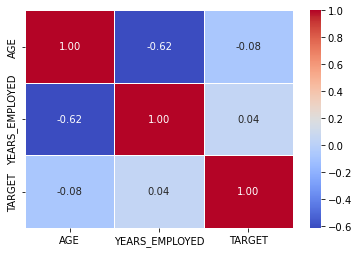

In [119]:
sns.heatmap(ctime_pinfo.corr(),\
            annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

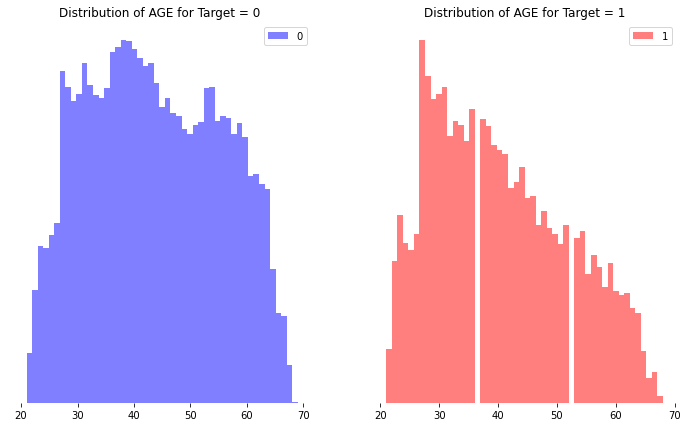

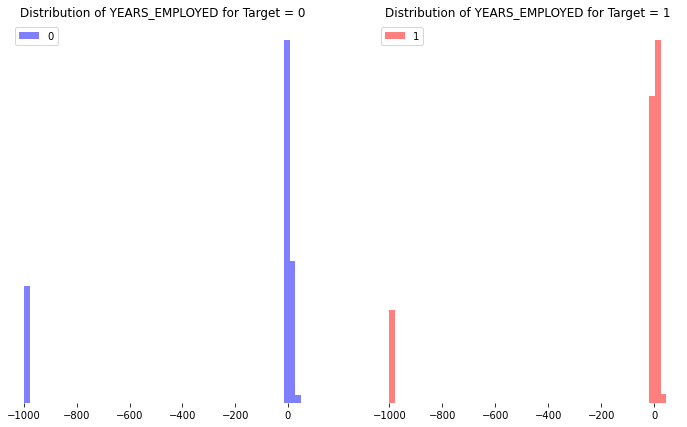

In [120]:
for i in ctime_pinfo.columns[:2]:
    fig,ax = plt.subplots(1,2 ,figsize = (12,7))
    class0 = ctime_pinfo[ctime_pinfo['TARGET'] == 0][i]
    class1 = ctime_pinfo[ctime_pinfo['TARGET'] == 1][i]

    ax[0].hist(class0, label='0', alpha=0.5, color='blue', bins=50)
    ax[1].hist(class1, label='1', alpha=0.5, color='red', bins=50)

    ax[0].set_title(f'Distribution of {i} for Target = 0')
    ax[1].set_title(f'Distribution of {i} for Target = 1')

    ax[0].spines[['left','top','right','bottom']].set_visible(False)
    ax[0].set_yticklabels([])
    ax[0].tick_params(left = False)
    ax[0].legend()

    ax[1].spines[['left','top','right','bottom']].set_visible(False)
    ax[1].set_yticklabels([])
    ax[1].tick_params(left = False)
    ax[1].legend()

+ It seems that the YEARS_EMPLOYED is not efficient with the target value -> can be removed

+ But looking the AGE, we can see the significant differences in 2 value of Target columns.
    - The Non-Default Clients ( Target = 0) are usually at the age from 30 to nearly 70 -> It means the Non-default clients are in the middle- aged or having a qualified life. But, the Default Clients(Target = 1) is significant at younger generation from maybe 28 and reduce dramatically if the clients are older.

    -> Despite the low corr with Target value, but Age is an important features that reflects strongly between 2 class

##### Conclusion

### Working and Education Information

In [17]:
weinfo_col = ['OCCUPATION_TYPE','ORGANIZATION_TYPE','NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE','TARGET']
weinfo = df1[weinfo_col]
weinfo

,OCCUPATION_TYPE,ORGANIZATION_TYPE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,TARGET
0,Core staff,School,State servant,Higher education,0
1,Laborers,Business Entity Type 3,Working,Secondary / secondary special,0
2,Core staff,Religion,Working,Secondary / secondary special,0
3,Laborers,Other,State servant,Secondary / secondary special,0
4,Managers,Other,State servant,Higher education,0
...,...,...,...,...,...
246004,Sales staff,Services,Working,Secondary / secondary special,0
246005,NaN,XNA,Pensioner,Secondary / secondary special,0
246006,Managers,School,Working,Higher education,0
246007,Laborers,Business Entity Type 1,Commercial associate,Secondary / secondary special,1


In [18]:
# check number unique values in order to plot
for i in weinfo_col:
    print(f'{i} - {weinfo[i].nunique()}')

OCCUPATION_TYPE - 18
ORGANIZATION_TYPE - 58
NAME_INCOME_TYPE - 8
NAME_EDUCATION_TYPE - 5
TARGET - 2


In [19]:
def unstack_bar_chart(df, col,width):
    fig, ax = plt.subplots(figsize=(12, 7))
    
    t_0 = df[df['TARGET'] == 0][col].value_counts()
    t_1 = df[df['TARGET'] == 1][col].value_counts()

    all_t = set(t_0.index) | set(t_1.index)
    index_mapping = {t: i for i, t in enumerate(all_t)}

    # Plot the unstacked bar chart
    x_0 = np.array([index_mapping[t] for t in t_0.index])
    x_1 = np.array([index_mapping[t] for t in t_1.index])

    ax.barh(x_0 - width/2, t_0, height=width, label='TARGET = 0')
    ax.barh(x_1 + width/2, t_1, height=width, label='TARGET = 1')
    ax.tick_params(axis='y', rotation=0) 

    # Set y-axis ticks and labels
    ax.set_yticks(np.arange(len(all_t)))
    ax.set_yticklabels(all_t)

    # Set labels and title
    ax.set_xlabel('Count')
    ax.set_ylabel(f'{col}')
    ax.set_title(f'Distribution of {col} by TARGET')
    ax.legend()

    plt.show()

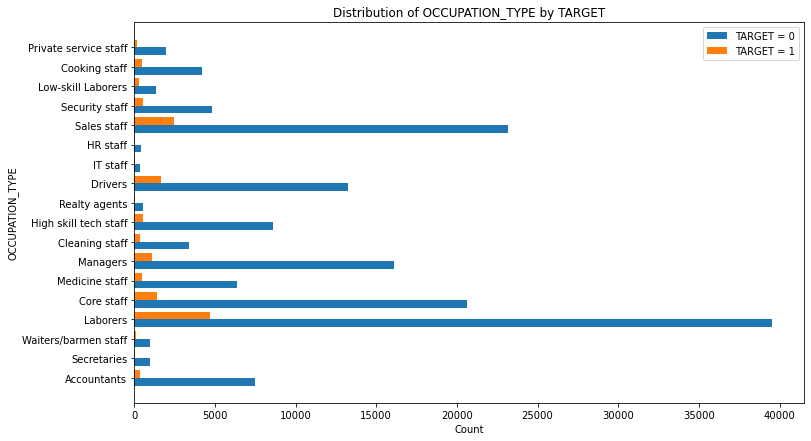

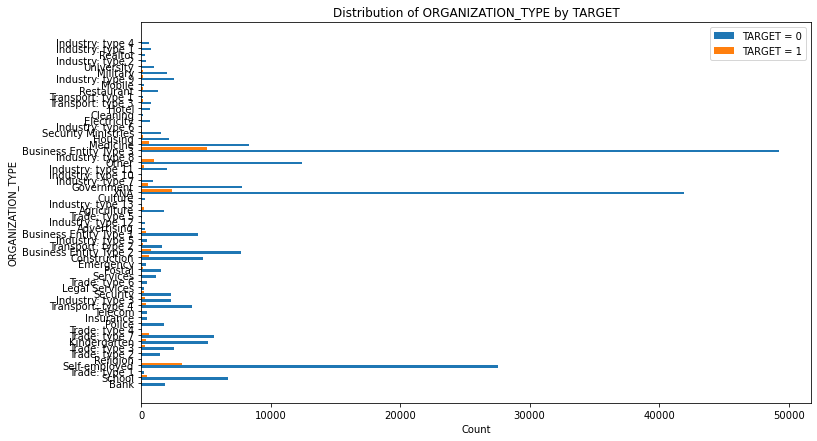

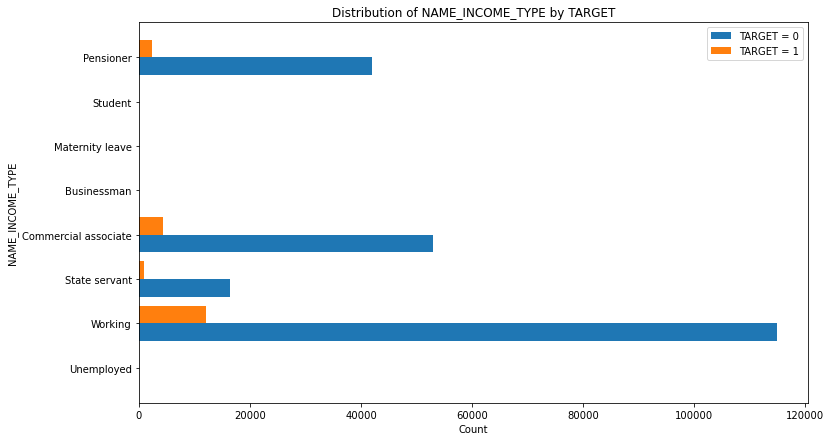

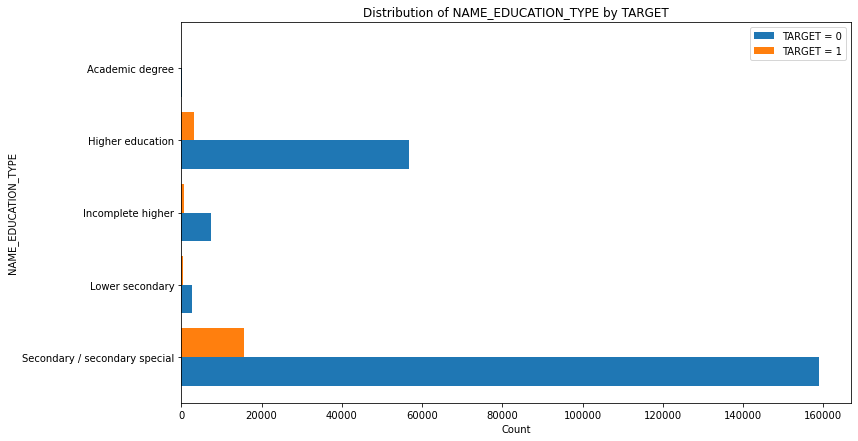

In [20]:

for i in range(4):
    unstack_bar_chart(weinfo,weinfo_col[i],0.4)


* The 3 largest percents of occupation that make and pay the loan on time is laborers, core staff and sale staff, while IT staff take the lowest place

* Most of applicants for loans are income from Working, followed by Commercial associate, Pensioner and State servant.

* The education of most of applicants for loans are higher than secondary -> It means that the customer's education level is quite qualified.

* 4 features here represent well in distribution in Target value. 

##### Conclude : Keep Working adn Education Information

### Asset information

In [66]:
ainfo_col = ['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','FLAG_OWN_CAR','FLAG_OWN_REALTY', 'OWN_CAR_AGE','TARGET']
ainfo = df1[ainfo_col]
ainfo

,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,FLAG_OWN_CAR,FLAG_OWN_REALTY,OWN_CAR_AGE,TARGET
0,1293502.5,35698.5,1129500.0,N,N,NaN,0
1,312682.5,29686.5,297000.0,N,Y,NaN,0
2,513000.0,21865.5,513000.0,N,Y,NaN,0
3,490495.5,27517.5,454500.0,N,Y,NaN,0
4,1530000.0,42075.0,1530000.0,Y,Y,8.0,0
...,...,...,...,...,...,...,...
246004,254700.0,27558.0,225000.0,N,N,NaN,0
246005,269550.0,12001.5,225000.0,N,Y,NaN,0
246006,677664.0,29979.0,585000.0,N,Y,NaN,0
246007,370107.0,20205.0,319500.0,N,Y,NaN,1


* Can replace null in car_age by -1 because nan only in the applicants who do not have car

In [22]:
ainfo['OWN_CAR_AGE'] = ainfo['OWN_CAR_AGE'].fillna(-1)

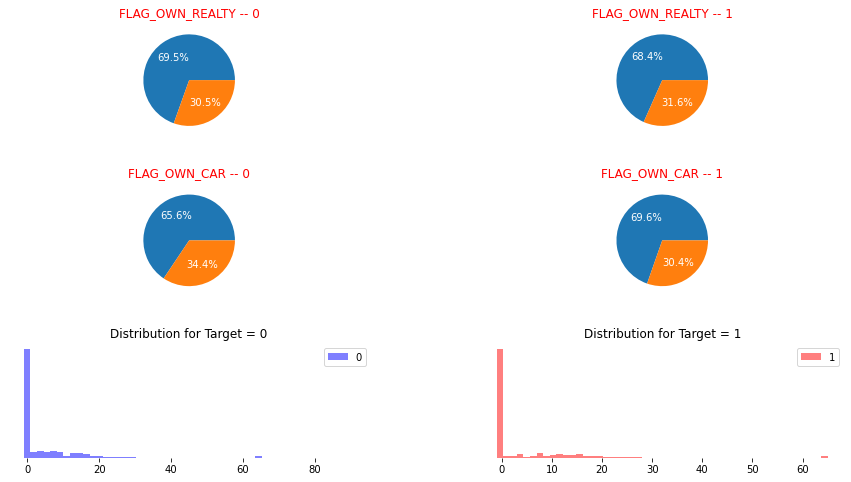

In [23]:
## reality asset
col = [['FLAG_OWN_CAR','FLAG_OWN_REALTY', 'OWN_CAR_AGE', 'TARGET']]
# Note that all this features are categorical columns but they are represented by number values
fig = plt.figure(figsize=(15, 8))
gs = fig.add_gridspec(3, 2)
plt.subplots_adjust(wspace=0.3,hspace=0.4)
ax1 = fig.add_subplot(gs[0, 0]) 
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[2, 0]) 
ax6 = fig.add_subplot(gs[2, 1]) 
# ax1
sizes = ainfo[ainfo['TARGET'] == 0]['FLAG_OWN_REALTY'].value_counts(normalize=True)
ax1.pie(sizes, autopct='%1.1f%%',labels = sizes.index, textprops=dict(color="white"))
ax1.set_title('FLAG_OWN_REALTY -- 0', color = 'red')
# ax2
sizes = ainfo[ainfo['TARGET'] == 1]['FLAG_OWN_REALTY'].value_counts(normalize=True)
ax2.pie(sizes, autopct='%1.1f%%',labels = sizes.index, textprops=dict(color="white"))
ax2.set_title('FLAG_OWN_REALTY -- 1', color = 'red')
# ax3
sizes = ainfo[ainfo['TARGET'] == 0]['FLAG_OWN_CAR'].value_counts(normalize=True)
ax3.pie(sizes, autopct='%1.1f%%',labels = sizes.index, textprops=dict(color="white"))
ax3.set_title('FLAG_OWN_CAR -- 0', color = 'red')
# ax4
sizes = ainfo[ainfo['TARGET'] == 1]['FLAG_OWN_CAR'].value_counts(normalize=True)
ax4.pie(sizes, autopct='%1.1f%%',labels = sizes.index, textprops=dict(color="white"))
ax4.set_title('FLAG_OWN_CAR -- 1', color = 'red')
# ax5 and ax6
class0 = ainfo[ainfo['TARGET'] == 0][ 'OWN_CAR_AGE']
class1 = ainfo[ainfo['TARGET'] == 1][ 'OWN_CAR_AGE']

ax5.hist(class0, label='0', alpha=0.5, color='blue', bins=50)
ax6.hist(class1, label='1', alpha=0.5, color='red', bins=50)

ax5.set_title('Distribution for Target = 0')
ax6.set_title('Distribution for Target = 1')

ax5.spines[['left','top','right','bottom']].set_visible(False)
ax5.set_yticklabels([])
ax5.tick_params(left = False)
ax5.legend()

ax6.spines[['left','top','right','bottom']].set_visible(False)
ax6.set_yticklabels([])
ax6.tick_params(left = False)
ax6.legend()



+ 3 Features have low distribution to Target value -> we can remove these 3 columns 

<AxesSubplot:>

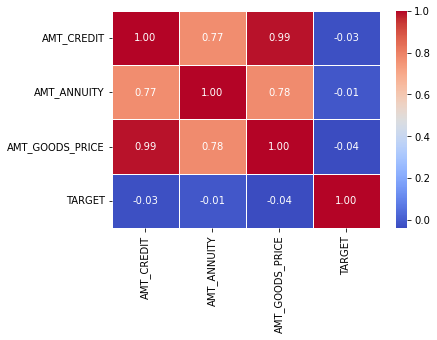

In [65]:
## money asset

sns.heatmap(ainfo[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','TARGET']].corr(),\
            annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)


+ These features have high corr with each other, to reduce the multicolinearity, I decide to remove AMT_CREDIT and AMT_GOOD_PRICE because that the AMT_CREDIT is AMT_ANNUITY x loan_years and AMT_GOODS_PRICE is relatively similar with AMT_CREDIT. 


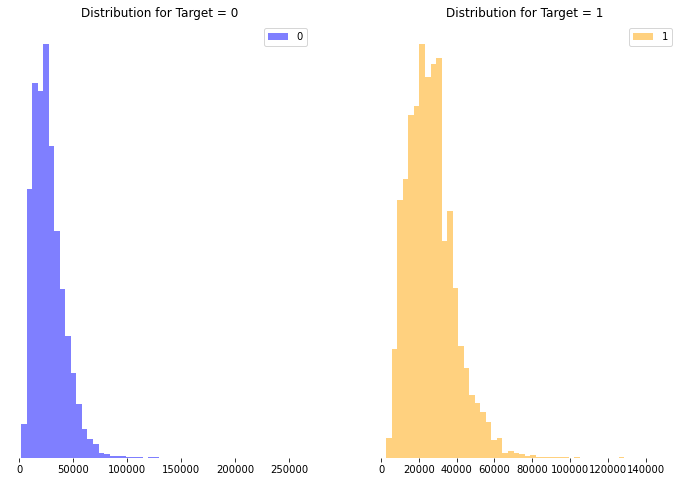

In [59]:
## Histogram of AMT_ANNUITY
ainfo_1 = ainfo[['AMT_ANNUITY','TARGET']] 

## Check dist
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
# Row 2 - Histograms
class0 =ainfo_1[ainfo_1['TARGET'] == 0]['AMT_ANNUITY']
class1 =ainfo_1[ainfo_1['TARGET'] == 1]['AMT_ANNUITY']

ax[0].hist(class0, label='0' ,alpha=0.5, color='blue', bins=50)
ax[1].hist(class1, label='1' ,alpha=0.5, color='orange', bins=50)



ax[0].set_title('Distribution for Target = 0')
ax[1].set_title('Distribution for Target = 1')

ax[0].spines[['left','top','right','bottom']].set_visible(False)
ax[0].set_yticklabels([])
ax[0].tick_params(left = False)
ax[0].legend()

ax[1].spines[['left','top','right','bottom']].set_visible(False)
ax[1].set_yticklabels([])
ax[1].tick_params(left = False)
ax[1].legend()

* From here I can see that Client in both 2 types: Default and Non-default are likely to accepted to take a loan with medium money yearly paid from 20000 to 50000. 

#### Conclusion : Keep only AMT_ANNUITY in Asset Information

### Contact Information

In [25]:
cinfo_col = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL','TARGET','DAYS_LAST_PHONE_CHANGE']
cinfo = df1[cinfo_col]
cinfo

,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,TARGET,DAYS_LAST_PHONE_CHANGE
0,1,1,0,1,1,0,0,-828.0
1,1,1,0,1,0,0,0,-617.0
2,1,1,0,1,0,0,0,-1106.0
3,1,1,1,1,1,0,0,-2536.0
4,1,1,1,1,0,0,0,-1070.0
...,...,...,...,...,...,...,...,...
246004,1,1,0,1,0,0,0,-273.0
246005,1,0,0,1,1,0,0,0.0
246006,1,1,0,1,0,1,0,-1909.0
246007,1,1,0,1,0,0,1,-322.0


<AxesSubplot:>

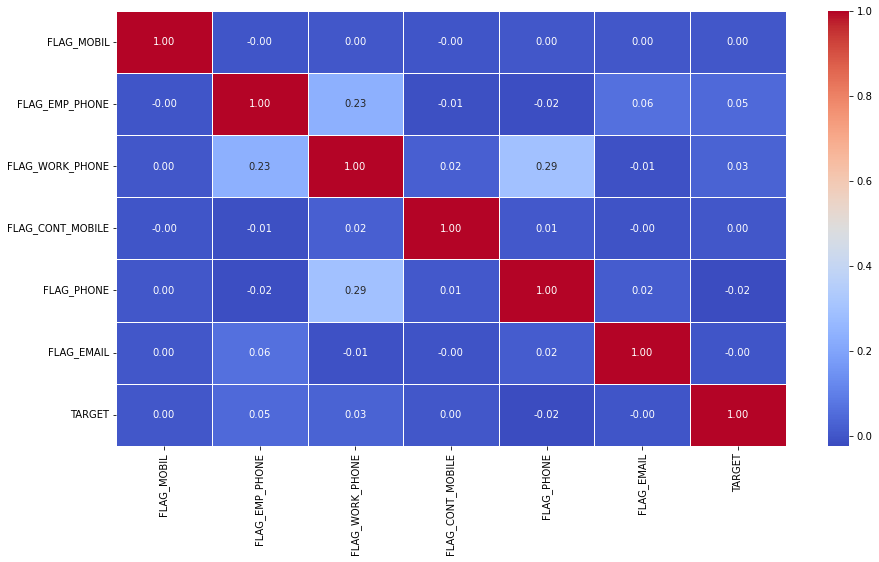

In [26]:
#First I want to EDA the Categorical cols
cinfo_1 = cinfo.iloc[:,:-1]
fig,ax = plt.subplots(figsize = (15,8))
correlation_matrix = cinfo_1.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax = ax)

* WE can see that these features have low corr with target but have low corr with each other

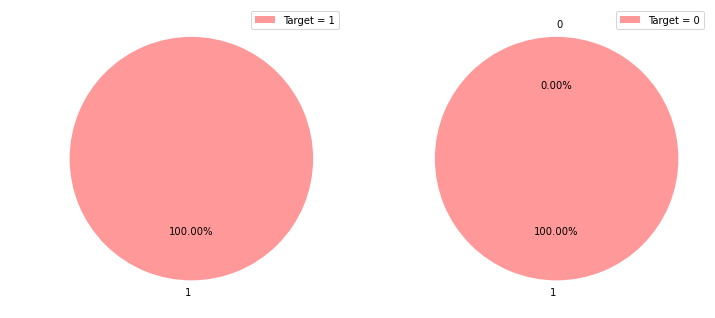

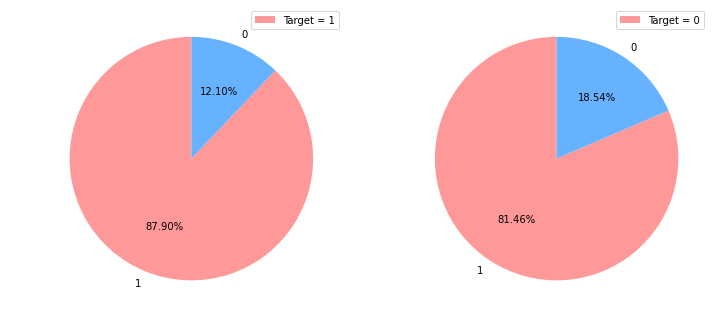

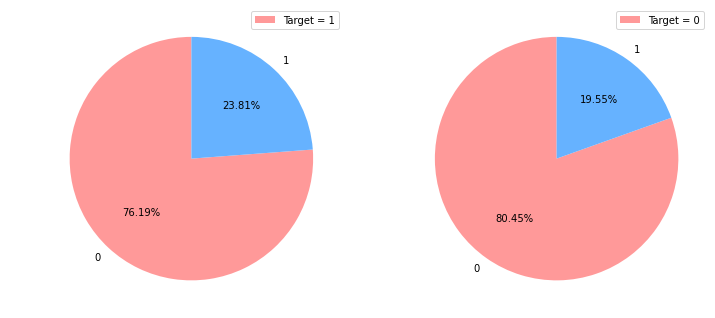

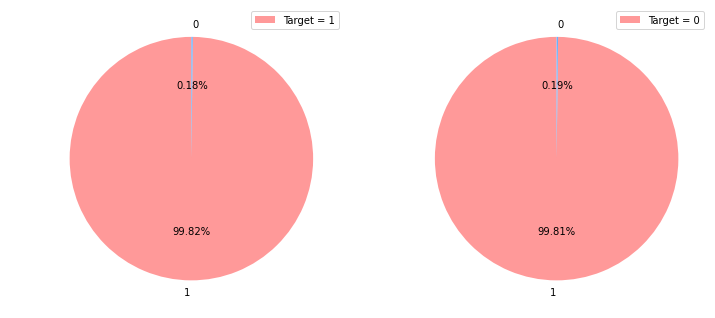

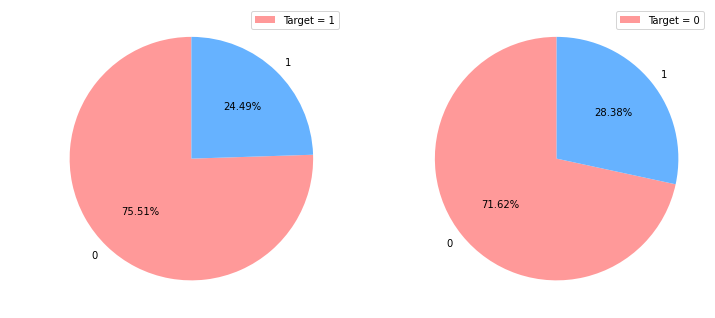

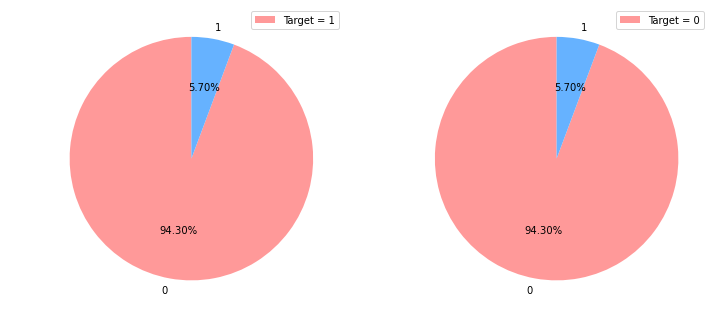

In [27]:
for i in range(6):
    fig, ax = plt.subplots(1,2,figsize = (12,7))
    ax[0].pie(x=cinfo_1[cinfo_1['TARGET']==1][cinfo_1.columns[i]].value_counts(),\
    labels=cinfo_1[cinfo_1['TARGET']==1][cinfo_1.columns[i]].value_counts().index,\
    startangle=90,autopct='%.2f%%',colors=['#FF9999', '#66B2FF']) 

    ax[1].pie(x=cinfo_1[cinfo_1['TARGET']==0][cinfo_1.columns[i]].value_counts(),\
    labels=cinfo_1[cinfo_1['TARGET']==0][cinfo_1.columns[i]].value_counts().index,\
    startangle=90,autopct='%.2f%%',colors=['#FF9999', '#66B2FF']) 

    ax[0].set_ylabel(cinfo_1.columns[i] + '\n', fontweight='bold', fontsize=12,color = 'white')
    ax[0].legend(labels=['Target = 1'])
    ax[1].legend(labels=['Target = 0'])

* These pie charts represent the distribution of the value with each value of a Target Features(0 and 1). But we can see here is that 
    + The differences between each categories is highly different 
    + 2 pie charts of each features are almost the same -> they do not have any impact on the Target value 

                          TARGET  DAYS_LAST_PHONE_CHANGE
TARGET                  1.000000                0.053825
DAYS_LAST_PHONE_CHANGE  0.053825                1.000000


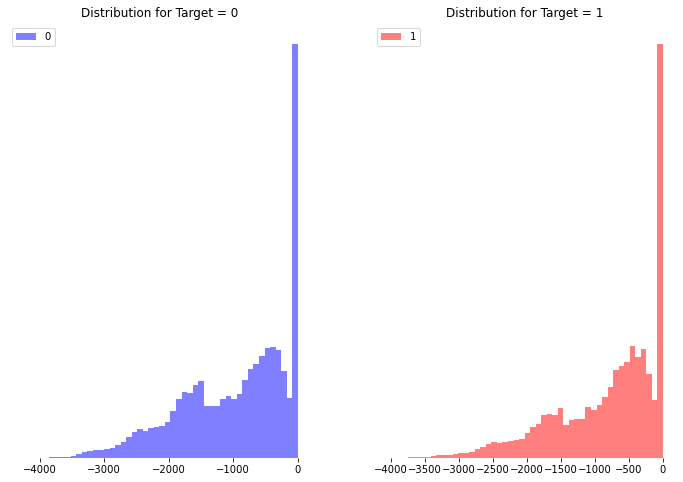

In [28]:
# Last but not least, we have the last numerical column
cinfo_2 = cinfo.iloc[:,6:]
print(cinfo_2.corr())

## Check dist
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
# Row 2 - Histograms
class0 = cinfo_2[cinfo_2['TARGET'] == 0]['DAYS_LAST_PHONE_CHANGE']
class1 =cinfo_2[cinfo_2['TARGET'] == 1]['DAYS_LAST_PHONE_CHANGE']

ax[0].hist(class0, label='0', alpha=0.5, color='blue', bins=50)
ax[1].hist(class1, label='1', alpha=0.5, color='red', bins=50)



ax[0].set_title('Distribution for Target = 0')
ax[1].set_title('Distribution for Target = 1')

ax[0].spines[['left','top','right','bottom']].set_visible(False)
ax[0].set_yticklabels([])
ax[0].tick_params(left = False)
ax[0].legend()

ax[1].spines[['left','top','right','bottom']].set_visible(False)
ax[1].set_yticklabels([])
ax[1].tick_params(left = False)
ax[1].legend()

* The distribution between 2 distribution charts is very similar -> This features do not impact a lot to Target value
-> can be removed

#### Conclude -> Remove all the contact features

### Region Information (v)

In [29]:
rinfo_col = ['REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION',
            'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY',
            'REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','TARGET']
rinfo = df1[rinfo_col]
rinfo

,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,TARGET
0,1,1,0,0,0,0,0,0,0
1,2,2,0,0,0,0,0,0,0
2,2,2,0,0,0,0,1,1,0
3,2,2,0,0,0,0,0,0,0
4,3,3,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...
246004,1,1,0,0,0,0,0,0,0
246005,2,2,0,0,0,0,0,0,0
246006,3,3,0,0,0,0,1,1,0
246007,2,2,0,0,0,1,1,0,1


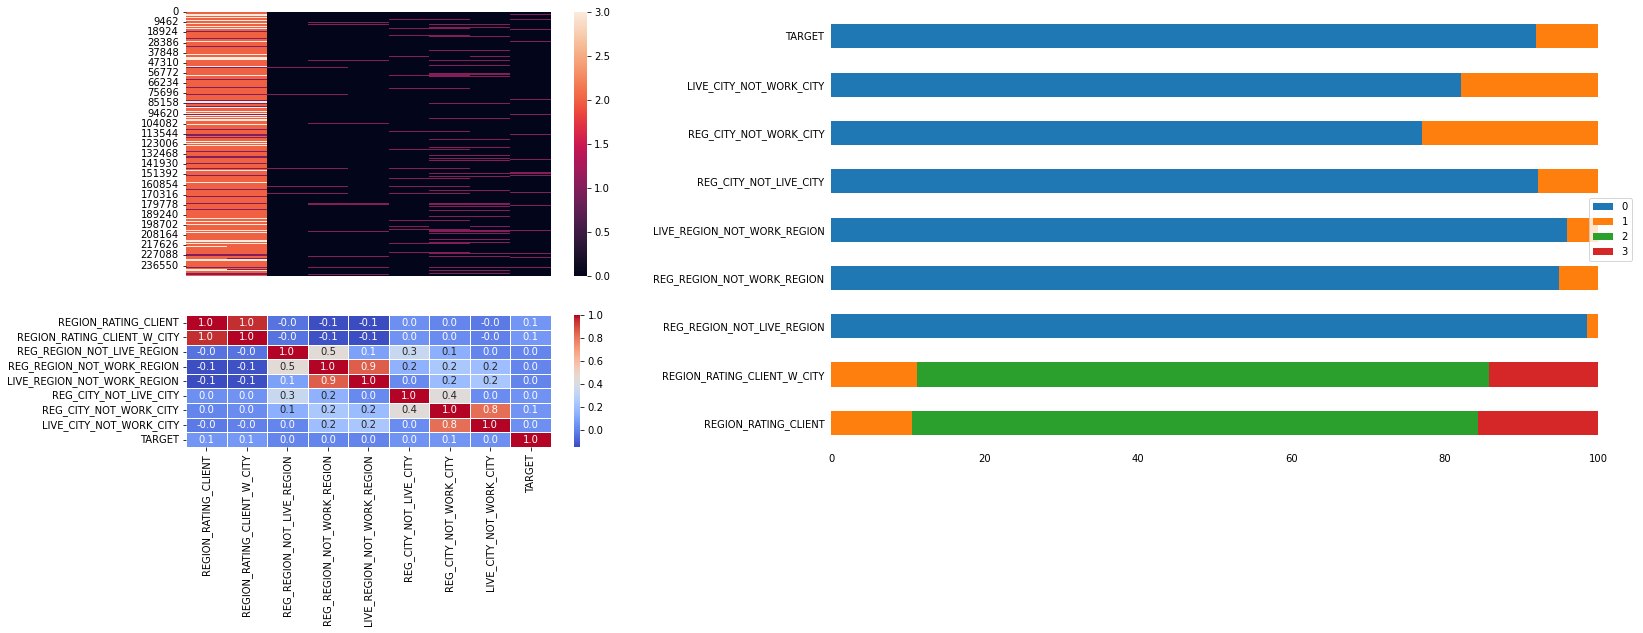

In [30]:
# Note that all this features are categorical columns but they are represented by number values
fig = plt.figure(figsize=(26, 8))
gs = fig.add_gridspec(2, 2, width_ratios=[1.7, 3],height_ratios = [2,1])
plt.subplots_adjust(wspace=0.3)
ax_top = fig.add_subplot(gs[0, 0]) 
ax_bot = fig.add_subplot(gs[1, 0]) 
ax_right = fig.add_subplot(gs[:, 1]) 

# ax_top
sns.heatmap(rinfo , ax = ax_top)
ax_top.set_xticklabels([])
ax_top.tick_params(bottom = False)
# ax_bot
correlation_matrix = rinfo.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f', linewidths=0.5, ax = ax_bot)

# ax_percent_value
perc_val = {}
for i in rinfo.columns:
    perc_val[i] = rinfo[i].value_counts(normalize= True) * 100
perc_val = pd.DataFrame(perc_val)
perc_val = perc_val.fillna(0)
perc_val.T.plot( kind = 'barh', ax = ax_right, width = 0.5, stacked= True)
ax_right.spines[['left','top','right','bottom']].set_visible(False)
ax_right.tick_params(bottom = False, left = False)

* Note
    + 'REGION_RATING_CLIENT' and 'REGION_RATING_CLIENT_W_CITY' are the same (corr = 1) 
    + 'LIVE_REGION_NOT_WORK_REGION' and 'REG_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_WORK_CITY' and 'LIVE_CITY_NOT_WORK_CITY', both couples have extremly high correlation with each other,0.9 and 0.8 respectively 
    + The correlation of all this features is very low with the Target (0.00 -> 0.10)
    + Features have an unbalaced percent in each value. 

-> Remove all these features

In [31]:
# also there is one feature representing the region information, this is numerical col so i put it here
rinfo_1 = df1[['REGION_POPULATION_RELATIVE', 'TARGET']]
rinfo_1.corr()

,REGION_POPULATION_RELATIVE,TARGET
REGION_POPULATION_RELATIVE,1.000000,-0.036908
TARGET,-0.036908,1.000000


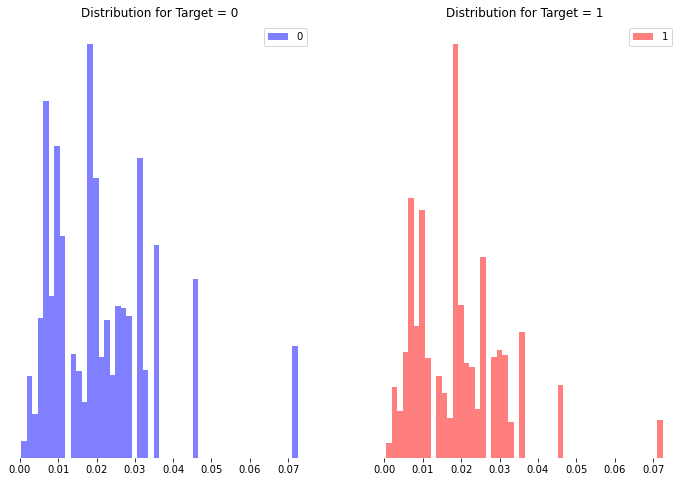

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
# Row 2 - Histograms
class0 = rinfo_1[rinfo_1['TARGET'] == 0]['REGION_POPULATION_RELATIVE']
class1 = rinfo_1[rinfo_1['TARGET'] == 1]['REGION_POPULATION_RELATIVE']

ax[0].hist(class0, label='0', alpha=0.5, color='blue', bins=50)
ax[1].hist(class1, label='1', alpha=0.5, color='red', bins=50)


ax[0].set_title('Distribution for Target = 0')
ax[1].set_title('Distribution for Target = 1')

ax[0].spines[['left','top','right','bottom']].set_visible(False)
ax[0].set_yticklabels([])
ax[0].tick_params(left = False)
ax[0].legend()

ax[1].spines[['left','top','right','bottom']].set_visible(False)
ax[1].set_yticklabels([])
ax[1].tick_params(left = False)
ax[1].legend()

* This feature also have low corr with target and it does not show well enough about the Target distribution
-> Still remove this feature

##### Conclude: This information is not useful at all -> remove region information

### Housing Information

In [33]:
start = df1.columns.get_loc('APARTMENTS_AVG')
end = df1.columns.get_loc('EMERGENCYSTATE_MODE')
hinfo_col = list(df1.columns[start:end+1])
hinfo_col.append('TARGET')
hinfo = df1[hinfo_col]
hinfo

,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,TARGET
0,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,...,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246004,0.2021,0.0887,0.9876,0.8300,0.0202,0.22,0.1034,0.6042,0.2708,0.0594,...,0.1509,0.2001,0.0757,0.1118,reg oper account,block of flats,0.2898,"Stone, brick",No,0
246005,0.0247,0.0435,0.9727,0.6260,0.0022,0.00,0.1034,0.0833,0.1250,0.0579,...,0.0205,0.0261,0.0000,0.0000,reg oper account,block of flats,0.0214,"Stone, brick",No,0
246006,0.1031,0.0862,0.9816,0.7484,0.0123,0.00,0.2069,0.1667,0.2083,NaN,...,0.0855,0.9445,0.0000,0.0000,reg oper account,block of flats,0.7970,Panel,No,0
246007,0.0124,NaN,0.9771,NaN,NaN,NaN,0.0690,0.0417,NaN,NaN,...,NaN,0.0062,NaN,NaN,NaN,block of flats,0.0086,"Stone, brick",No,1


Before deep analyze, we can see from here there are so many null values in each features, let's have a particular sight

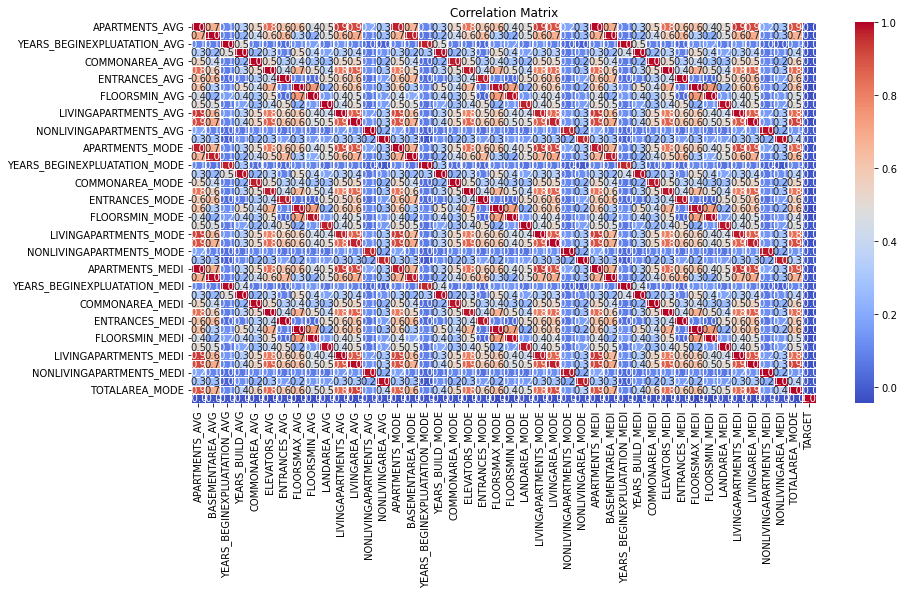

In [34]:
correlation_matrix = hinfo.corr()
plt.figure(figsize=(14, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [35]:
missing_value_df = hinfo.isnull().sum() * 100 / len(hinfo)
missing_value_df


APARTMENTS_AVG                  50.804645
BASEMENTAREA_AVG                58.540948
YEARS_BEGINEXPLUATATION_AVG     48.812035
YEARS_BUILD_AVG                 66.535777
COMMONAREA_AVG                  69.887687
ELEVATORS_AVG                   53.335041
ENTRANCES_AVG                   50.383929
FLOORSMAX_AVG                   49.808340
FLOORSMIN_AVG                   67.865403
LANDAREA_AVG                    59.400266
LIVINGAPARTMENTS_AVG            68.370263
LIVINGAREA_AVG                  50.237186
NONLIVINGAPARTMENTS_AVG         69.456402
NONLIVINGAREA_AVG               55.259767
APARTMENTS_MODE                 50.804645
BASEMENTAREA_MODE               58.540948
YEARS_BEGINEXPLUATATION_MODE    48.812035
YEARS_BUILD_MODE                66.535777
COMMONAREA_MODE                 69.887687
ELEVATORS_MODE                  53.335041
ENTRANCES_MODE                  50.383929
FLOORSMAX_MODE                  49.808340
FLOORSMIN_MODE                  67.865403
LANDAREA_MODE                   59

* Through the corr plot, I can see that:
    + All of the features is really low corr with target value 
    + And each features has a such relatively high corr with each other 

* Through the given Missing values percent Series
    + All of the features have higher than 48% missing values in each ones 

-> From this proof, We can remove all this features

### Conclusion : Remove all Housing Information

#### Social Information

In [36]:
sinfo_col = ['TARGET','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']
sinfo = df1[sinfo_col]
sinfo

,TARGET,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
0,0,1.0,0.0,1.0,0.0
1,0,2.0,0.0,2.0,0.0
2,0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0
4,0,2.0,0.0,2.0,0.0
...,...,...,...,...,...
246004,0,0.0,0.0,0.0,0.0
246005,0,0.0,0.0,0.0,0.0
246006,0,6.0,0.0,6.0,0.0
246007,1,0.0,0.0,0.0,0.0


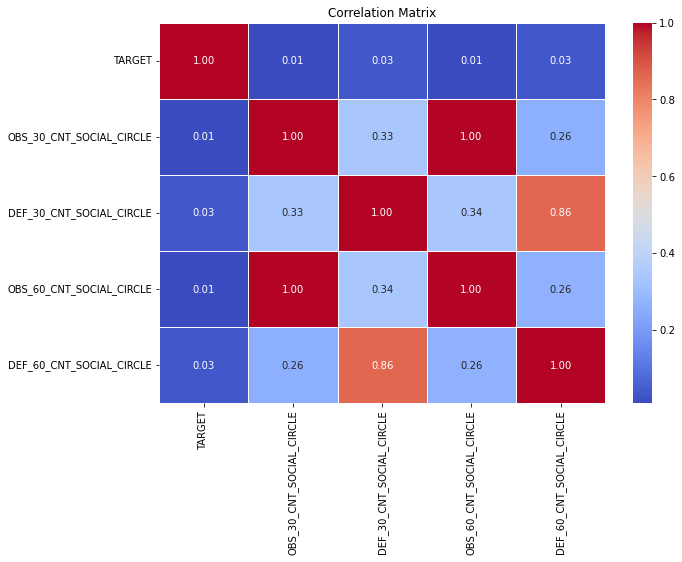

In [37]:
correlation_matrix = sinfo.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

* cột OBS_30_CNT_SOCIAL_CIRCLE và OBS_60_CNT_SOCIAL_CIRCLE giống hệt nhau ( corr = 1) -> drop 1 trong 2 cột

* DEF_30_CNT_SOCIAL_CIRCLE và DEF_60_CNT_SOCIAL_CIRCLE có hệ số tương quan khá cao,0.86 -> có thể drop 1 trong 2 cột

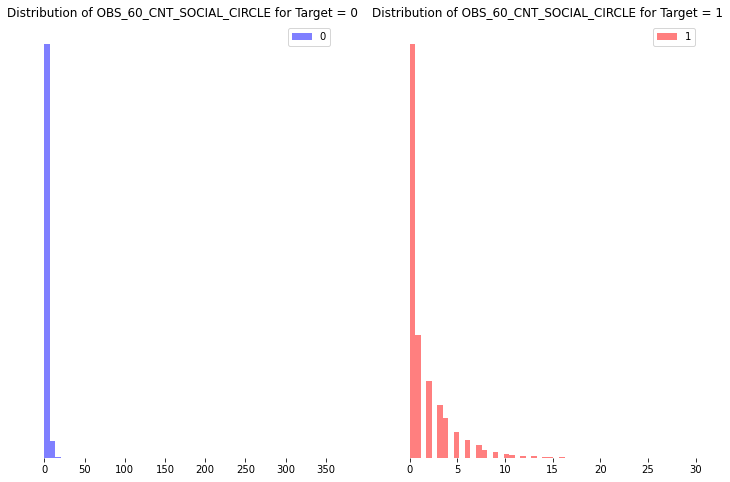

In [38]:
# Drop 2 column related to 30 days.
sinfo = sinfo[['OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','TARGET']].copy()
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
# Row 2 - Histograms
class0 = sinfo[sinfo['TARGET'] == 0]['OBS_60_CNT_SOCIAL_CIRCLE']
class1 = sinfo[sinfo['TARGET'] == 1]['OBS_60_CNT_SOCIAL_CIRCLE']

ax[0].hist(class0, label='0', alpha=0.5, color='blue', bins=50)
ax[1].hist(class1, label='1', alpha=0.5, color='red', bins=50)



ax[0].set_title('Distribution of OBS_60_CNT_SOCIAL_CIRCLE for Target = 0')
ax[1].set_title('Distribution of OBS_60_CNT_SOCIAL_CIRCLE for Target = 1')

ax[0].spines[['left','top','right','bottom']].set_visible(False)
ax[0].set_yticklabels([])
ax[0].tick_params(left = False)
ax[0].legend()

ax[1].spines[['left','top','right','bottom']].set_visible(False)
ax[1].set_yticklabels([])
ax[1].tick_params(left = False)
ax[1].legend()


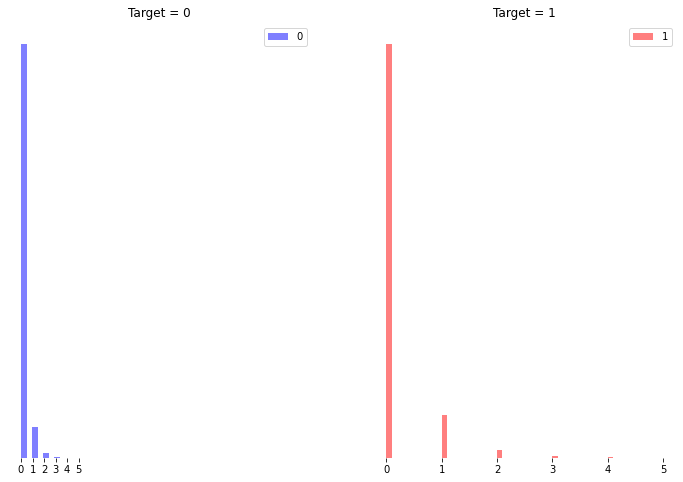

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
class0 = sinfo[sinfo['TARGET'] == 0].loc[:, 'DEF_60_CNT_SOCIAL_CIRCLE']
class1 = sinfo[sinfo['TARGET'] == 1].loc[:, 'DEF_60_CNT_SOCIAL_CIRCLE']

ax[0].hist(class0, label='0', alpha=0.5, color='blue', bins=50)
ax[1].hist(class1, label='1', alpha=0.5, color='red', bins=50)

ax[0].spines[['left','top','right','bottom']].set_visible(False)
ax[0].set_xticks([i for i in range(0,6)])
ax[0].set_yticklabels([])
ax[0].set_title(f'Target = 0')
ax[0].tick_params(left = False)
ax[0].legend()

ax[1].spines[['left','top','right','bottom']].set_visible(False)
ax[1].set_xticks([i for i in range(0,6)])
ax[1].set_yticklabels([])
ax[1].tick_params(left = False)
ax[1].set_title(f'Target = 1')
ax[1].legend()

* This feature seems that not having any impact on Target value because 2 histogram plot had the same trrnds -> can be removed

* Conclude

#### Ext Source Information

In [40]:
extsourceinfo_col = ['TARGET','EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
extsourceinfo = df1[extsourceinfo_col]
extsourceinfo

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
0,0,0.311267,0.622246,NaN
1,0,NaN,0.650442,NaN
2,0,NaN,0.322738,NaN
3,0,NaN,0.354225,0.621226
4,0,NaN,0.714279,0.540654
...,...,...,...,...
246004,0,0.145570,0.681632,NaN
246005,0,NaN,0.115992,NaN
246006,0,0.744026,0.535722,0.218859
246007,1,NaN,0.514163,0.661024


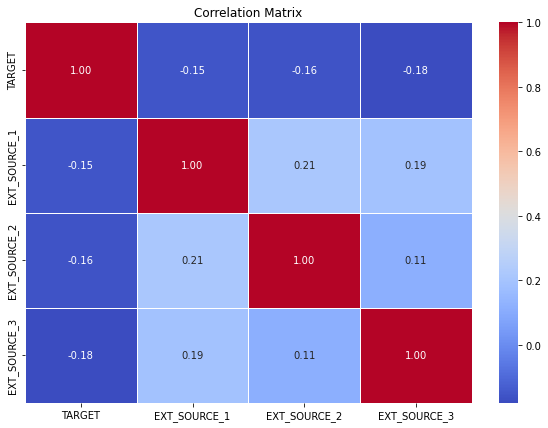

In [41]:
correlation_matrix = extsourceinfo.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

* tất cả các features này đều có corr âm với lại biến target, có nghĩa là biến này càng tăng thì biến target sẽ giảm, hay là khả năng trả được nợ sẽ cao hơn ( target càng giảm về 0)


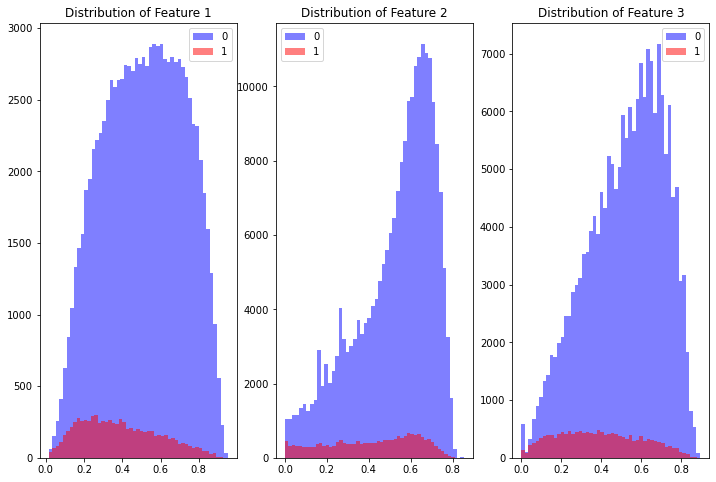

In [42]:
# distribution of each features

fig, ax = plt.subplots(1, 3, figsize=(12, 8))
for i in range(3):
    class0 = extsourceinfo[extsourceinfo['TARGET'] == 0].iloc[:, i + 1]
    class1 = extsourceinfo[extsourceinfo['TARGET'] == 1].iloc[:, i + 1]
    
    ax[i].hist(class0, label='0', alpha=0.5, color='blue', bins=50)
    ax[i].hist(class1, label='1', alpha=0.5, color='red', bins=50)
    
    ax[i].set_title(f'Distribution of Feature {i + 1}')
    ax[i].legend()


In [43]:
extsourceinfo.isnull().sum() / extsourceinfo.shape[0] * 100

TARGET           0.000000
EXT_SOURCE_1    56.308916
EXT_SOURCE_2     0.215033
EXT_SOURCE_3    19.846428
dtype: float64


-> 2 featues 'EXT_SOURCE_1' và 'EXT_SOURCE_3' đống vai trò quan trọng trong model, do có sự phân hóa rõ rệt giữa các giá trị cho target value, tuy nhiên 'EXT_SOURCE_2' thì lại ko như thế, distribution của 2 bên hầu như giống nhau nên có thể bỏ feature này đi

* Conclusion

-> Giữ lại 'EXT_SOURCE_1' và 'EXT_SOURCE_3' và bỏ 'EXT_SOURCE_2'

-> Tuy nhiên có vấn đề là ở ext_source_1 có hơn 56% là giá trị null nên cần phải xem xét xem nên fillna bằng mean hay median thì sẽ hợp lí 

### Document Information

In [44]:
start = df1.columns.get_loc('FLAG_DOCUMENT_2')
end = df1.columns.get_loc('FLAG_DOCUMENT_21')
dinfo_col = list(df1.columns[start:end+1])
dinfo_col.append('TARGET')
dinfo = df1[dinfo_col]
dinfo

,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,...,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246004,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246005,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246006,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246007,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


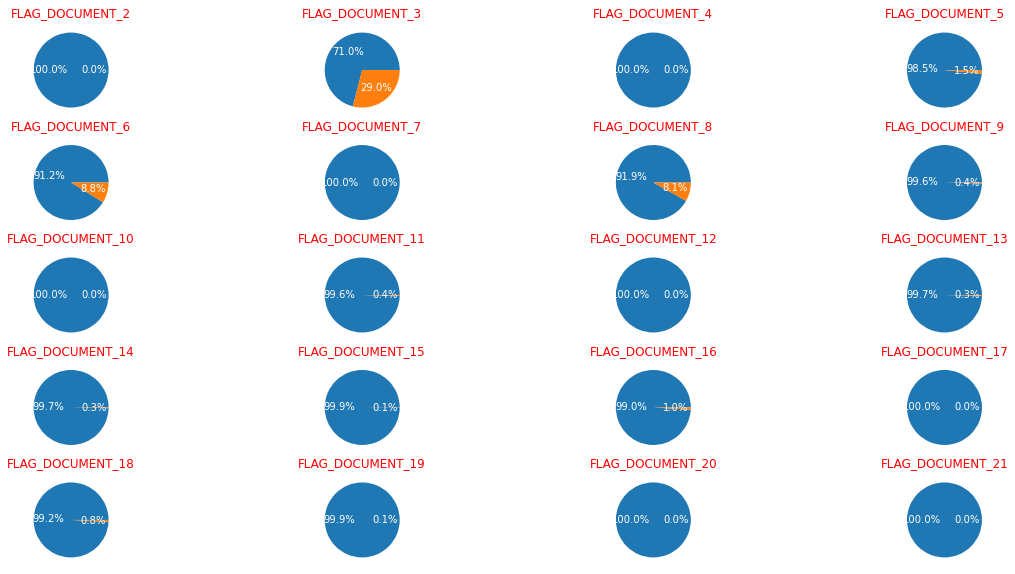

In [45]:
col= dinfo.columns
fig, ax = plt.subplots(round(len(col)/4),4,figsize=(20,10))
ite = 0 
for i in range(0,round(len(col)/4)):
    for j in range(0,4):
        sizes = dinfo[col[ite]].value_counts(normalize=True)
        ax[i][j].pie(sizes, autopct='%1.1f%%',labels = sizes.index, textprops=dict(color="white"))
        ax[i][j].set_title(col[ite], color = 'red')
        ite +=1
# Show the figure
plt.show()

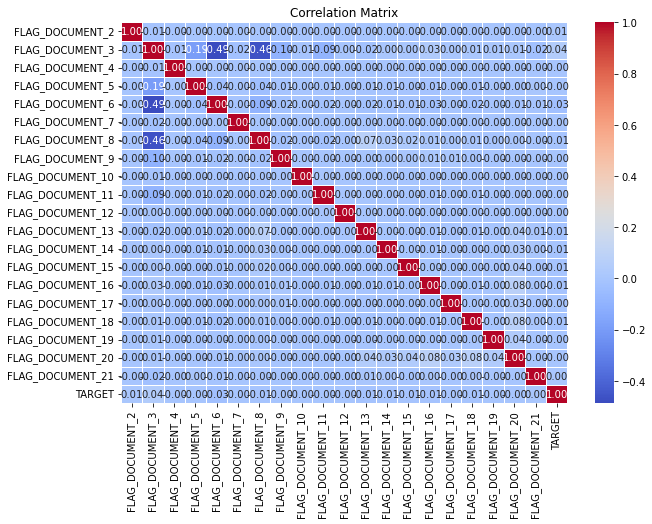

In [46]:
## Check corr,
correlation_matrix = dinfo.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

* Thông qua 2 bảng pie chart và bảng corr này, ta càng khẳng định hơn kết luận là bỏ hết tất cả các features liên quan đén document trừ document 3 do
    + Correlation cực tháp (0.00x)
    + Tỉ lệ chênh lệnh giữa các value quá cao


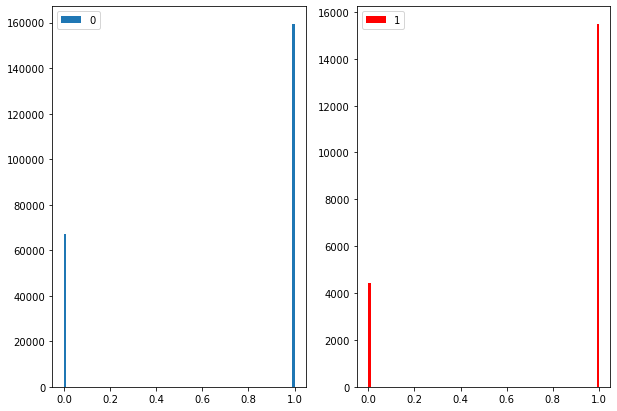

In [47]:
dinfo = dinfo[['TARGET','FLAG_DOCUMENT_3']]
fig,ax = plt.subplots(1,2,figsize =(10,7))
class0 = dinfo[dinfo['TARGET']==0]['FLAG_DOCUMENT_3']
class1 = dinfo[dinfo['TARGET']==1]['FLAG_DOCUMENT_3']
ax[0].hist(class0,bins = 100,label = 0)
ax[1].hist(class1,bins = 100,color = 'red',label= 1)
ax[0].legend()
ax[1].legend()

* Mặc dù ít sự chênh lệnh nhưng khi plot với target thì gần như là distribution của cả 2 target đều gần như y hệt nhau
-> Bỏ thêm cột này 


--> Conclude , Remove Document Information

### Bureau Information

In [48]:
binfo_col = [
'TARGET',
'AMT_REQ_CREDIT_BUREAU_HOUR',
'AMT_REQ_CREDIT_BUREAU_DAY',
'AMT_REQ_CREDIT_BUREAU_WEEK',
'AMT_REQ_CREDIT_BUREAU_MON',
'AMT_REQ_CREDIT_BUREAU_QRT',
'AMT_REQ_CREDIT_BUREAU_YEAR'
]
binfo = df1[binfo_col]
binfo


,TARGET,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,1.0,1.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
246004,0,NaN,NaN,NaN,NaN,NaN,NaN
246005,0,NaN,NaN,NaN,NaN,NaN,NaN
246006,0,1.0,0.0,0.0,1.0,0.0,1.0
246007,1,0.0,0.0,0.0,0.0,0.0,0.0


* This infomation is all about the enquires of the Clients to Bureau in separting time 

--> To make easier, we can convert all of column in this df into day and summary all.

--> After that we need to check if this column is needed( corr with target)


In [49]:
## Add one column convert the value into day and sum all
binfo['AMT_REQ_CREDIT_BUREAU_TOTAL_DAY'] = (
    binfo['AMT_REQ_CREDIT_BUREAU_HOUR'] / 24 +
    binfo['AMT_REQ_CREDIT_BUREAU_DAY'] +
    binfo['AMT_REQ_CREDIT_BUREAU_MON'] * 30 +
    binfo['AMT_REQ_CREDIT_BUREAU_YEAR'] * 365 +
    binfo['AMT_REQ_CREDIT_BUREAU_WEEK'] * 7 +
    binfo['AMT_REQ_CREDIT_BUREAU_QRT'] * 3 * 30
)
## And so, there are only 2 useful features in this df is Target and the new col
binfo = binfo[['TARGET','AMT_REQ_CREDIT_BUREAU_TOTAL_DAY']]
binfo

,TARGET,AMT_REQ_CREDIT_BUREAU_TOTAL_DAY
0,0,0.000000
1,0,NaN
2,0,0.000000
3,0,455.000000
4,0,0.000000
...,...,...
246004,0,NaN
246005,0,NaN
246006,0,395.041667
246007,1,0.000000


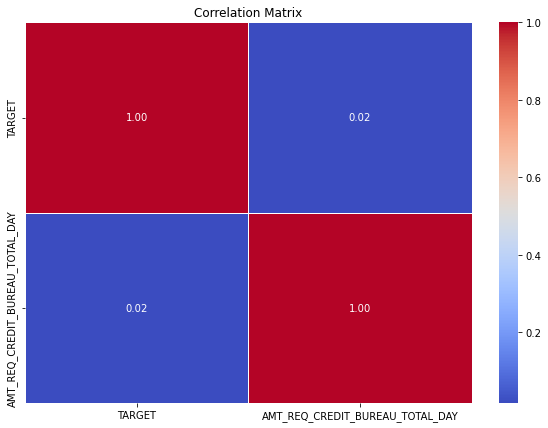

In [50]:
## Check corr,
correlation_matrix = binfo.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

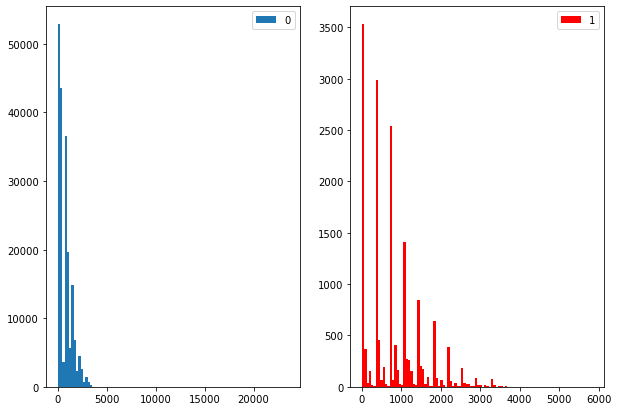

In [51]:
## Check distribution
fig,ax = plt.subplots(1,2,figsize =(10,7))
class0 = binfo[binfo['TARGET']==0]['AMT_REQ_CREDIT_BUREAU_TOTAL_DAY']
class1 = binfo[binfo['TARGET']==1]['AMT_REQ_CREDIT_BUREAU_TOTAL_DAY']
ax[0].hist(class0,bins = 100,label = 0)
ax[1].hist(class1,bins = 100,color = 'red',label= 1)
ax[0].legend()
ax[1].legend()

* Mặc dù có tỉ lệ tương quan tương đối thấp (0.02) nhưng features này nó có sự phân chia rõ ràng giữa các biến target. Hầu hêt các khách hàng được xếp vào target = 1(không trả nợ) đều hầu hết là các khách hàng đưa ra yêu cầu check lịch sử tín dụng từ Credit Burueau từ trước đó, còn ở biến target 0, % khách hàng chiếm nhiều nhất là khách hàng chưa từng có một khoản vay ở Credit Bureau nào. 

-> Conclude, tạo thêm 1 cột sum tất cả các giá trị vào. 


## 

In [52]:
# df1.to_csv("../Final_train_table/01_application_train.csv",index= False)
